In [1]:
!pip install factor-analyzer 


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows',200)

# Clustering

## 1. Read the data and perform basic analysis such as printing a few rows (head and tail), info, data summary, null values duplicate values, etc.

In [4]:
data=pd.read_excel('Clustering+Clean+Ads_Data.xlsx')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

In [6]:
data.head()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.0031,0.0,0.0
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.0,0.35,0.0,0.0035,0.0,0.0
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.0,0.35,0.0,0.0028,0.0,0.0
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.0,0.35,0.0,0.0020,0.0,0.0
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.0,0.35,0.0,0.0041,0.0,0.0


In [7]:
data.tail()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
23061,2020-9-13-7,Format5,720,300,216000,Inter220,Web,Mobile,Video,1,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
23062,2020-11-2-7,Format5,720,300,216000,Inter224,Web,Desktop,Video,3,2,2,1,0.04,0.35,0.0260,NaN,NaN,NaN
23063,2020-9-14-22,Format5,720,300,216000,Inter218,App,Mobile,Video,2,1,1,1,0.05,0.35,0.0325,NaN,NaN,NaN
23064,2020-11-18-2,Format4,120,600,72000,inter230,Video,Mobile,Video,7,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
23065,2020-9-14-0,Format5,720,300,216000,Inter221,App,Mobile,Video,2,2,2,1,0.09,0.35,0.0585,NaN,NaN,NaN


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Ad - Length,23066.0,3.851631e+02,2.336514e+02,120.0000,120.000000,300.00000,7.200000e+02,728.00
Ad- Width,23066.0,3.378960e+02,2.030929e+02,70.0000,250.000000,300.00000,6.000000e+02,600.00
Ad Size,23066.0,9.667447e+04,6.153833e+04,33600.0000,72000.000000,72000.00000,8.400000e+04,216000.00
Available_Impressions,23066.0,2.432044e+06,4.742888e+06,1.0000,33672.250000,483771.00000,2.527712e+06,27592861.00
Matched_Queries,23066.0,1.295099e+06,2.512970e+06,1.0000,18282.500000,258087.50000,1.180700e+06,14702025.00
Impressions,23066.0,1.241520e+06,2.429400e+06,1.0000,7990.500000,225290.00000,1.112428e+06,14194774.00
Clicks,23066.0,1.067852e+04,1.735341e+04,1.0000,710.000000,4425.00000,1.279375e+04,143049.00
Spend,23066.0,2.706626e+03,4.067927e+03,0.0000,85.180000,1425.12500,3.121400e+03,26931.87
Fee,23066.0,3.351231e-01,3.196322e-02,0.2100,0.330000,0.35000,3.500000e-01,0.35
Revenue,23066.0,1.924252e+03,3.105238e+03,0.0000,55.365375,926.33500,2.091338e+03,21276.18


In [9]:
data.isnull().sum()

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      4736
CPM                      4736
CPC                      4736
dtype: int64

In [10]:
data.duplicated().sum()

0

## 2. Treat missing values in CPC, CTR and CPM using the formula given.

In [11]:
data.columns

Index(['Timestamp', 'InventoryType', 'Ad - Length', 'Ad- Width', 'Ad Size',
       'Ad Type', 'Platform', 'Device Type', 'Format', 'Available_Impressions',
       'Matched_Queries', 'Impressions', 'Clicks', 'Spend', 'Fee', 'Revenue',
       'CTR', 'CPM', 'CPC'],
      dtype='object')

In [12]:
def calculate_cpc(x):
    spend=data['Spend']
    click=data['Clicks']
    cpc = spend/click
    return cpc

In [13]:
def calculate_ctr(x):
    click=data['Clicks']
    imp=data['Impressions']
    ctr = (click/imp)*100
    return ctr

In [14]:
def calculate_cpm(x):
    spend=data['Spend']
    imp=data['Impressions']
    cpm = (spend/imp)*1000
    return cpm

In [15]:
#delete
data['ctr_copy']=data['CTR']
data['cpm_copy']=data['CPM']
data['cpc_copy']=data['CPC']

In [16]:
#delete
null_ctr=data[data['ctr_copy'].isnull()==True].index
null_cpm=data[data['cpm_copy'].isnull()==True].index
null_cpc=data[data['cpc_copy'].isnull()==True].index

In [17]:
data['CPC']= data[['CPC']].apply(lambda x: calculate_cpc(x))
data['CTR']= data[['CTR']].apply(lambda x: calculate_ctr(x))
data['CPM']= data[['CPM']].apply(lambda x: calculate_cpm(x))

In [18]:
data.head()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,ctr_copy,cpm_copy,cpc_copy
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.309598,0.0,0.0,0.0031,0.0,0.0
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.0,0.35,0.0,0.350877,0.0,0.0,0.0035,0.0,0.0
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.0,0.35,0.0,0.281690,0.0,0.0,0.0028,0.0,0.0
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.0,0.35,0.0,0.202020,0.0,0.0,0.0020,0.0,0.0
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.0,0.35,0.0,0.413223,0.0,0.0,0.0041,0.0,0.0


In [19]:
data.tail()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,ctr_copy,cpm_copy,cpc_copy
23061,2020-9-13-7,Format5,720,300,216000,Inter220,Web,Mobile,Video,1,1,1,1,0.07,0.35,0.0455,100.0,70.0,0.07,NaN,NaN,NaN
23062,2020-11-2-7,Format5,720,300,216000,Inter224,Web,Desktop,Video,3,2,2,1,0.04,0.35,0.0260,50.0,20.0,0.04,NaN,NaN,NaN
23063,2020-9-14-22,Format5,720,300,216000,Inter218,App,Mobile,Video,2,1,1,1,0.05,0.35,0.0325,100.0,50.0,0.05,NaN,NaN,NaN
23064,2020-11-18-2,Format4,120,600,72000,inter230,Video,Mobile,Video,7,1,1,1,0.07,0.35,0.0455,100.0,70.0,0.07,NaN,NaN,NaN
23065,2020-9-14-0,Format5,720,300,216000,Inter221,App,Mobile,Video,2,2,2,1,0.09,0.35,0.0585,50.0,45.0,0.09,NaN,NaN,NaN


In [20]:
#delete
data.drop(['ctr_copy','cpm_copy','cpc_copy'], inplace=True, axis=1)

In [21]:
data

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.00,0.35,0.0000,0.309598,0.0,0.00
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.00,0.35,0.0000,0.350877,0.0,0.00
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.00,0.35,0.0000,0.281690,0.0,0.00
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.00,0.35,0.0000,0.202020,0.0,0.00
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.00,0.35,0.0000,0.413223,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23061,2020-9-13-7,Format5,720,300,216000,Inter220,Web,Mobile,Video,1,1,1,1,0.07,0.35,0.0455,100.000000,70.0,0.07
23062,2020-11-2-7,Format5,720,300,216000,Inter224,Web,Desktop,Video,3,2,2,1,0.04,0.35,0.0260,50.000000,20.0,0.04
23063,2020-9-14-22,Format5,720,300,216000,Inter218,App,Mobile,Video,2,1,1,1,0.05,0.35,0.0325,100.000000,50.0,0.05
23064,2020-11-18-2,Format4,120,600,72000,inter230,Video,Mobile,Video,7,1,1,1,0.07,0.35,0.0455,100.000000,70.0,0.07


In [22]:
print('The total number of null values in each column is as follows:')
data.isnull().sum()

The total number of null values in each column is as follows:


Timestamp                0
InventoryType            0
Ad - Length              0
Ad- Width                0
Ad Size                  0
Ad Type                  0
Platform                 0
Device Type              0
Format                   0
Available_Impressions    0
Matched_Queries          0
Impressions              0
Clicks                   0
Spend                    0
Fee                      0
Revenue                  0
CTR                      0
CPM                      0
CPC                      0
dtype: int64

## 3. Check if there are any outliers. Do you think treating outliers is necessary for K-Means clustering? Based on your judgement decide whether to treat outliers and if yes, which method to employ. (As an analyst your judgement may be different from another analyst).

In [23]:
data.columns

Index(['Timestamp', 'InventoryType', 'Ad - Length', 'Ad- Width', 'Ad Size',
       'Ad Type', 'Platform', 'Device Type', 'Format', 'Available_Impressions',
       'Matched_Queries', 'Impressions', 'Clicks', 'Spend', 'Fee', 'Revenue',
       'CTR', 'CPM', 'CPC'],
      dtype='object')

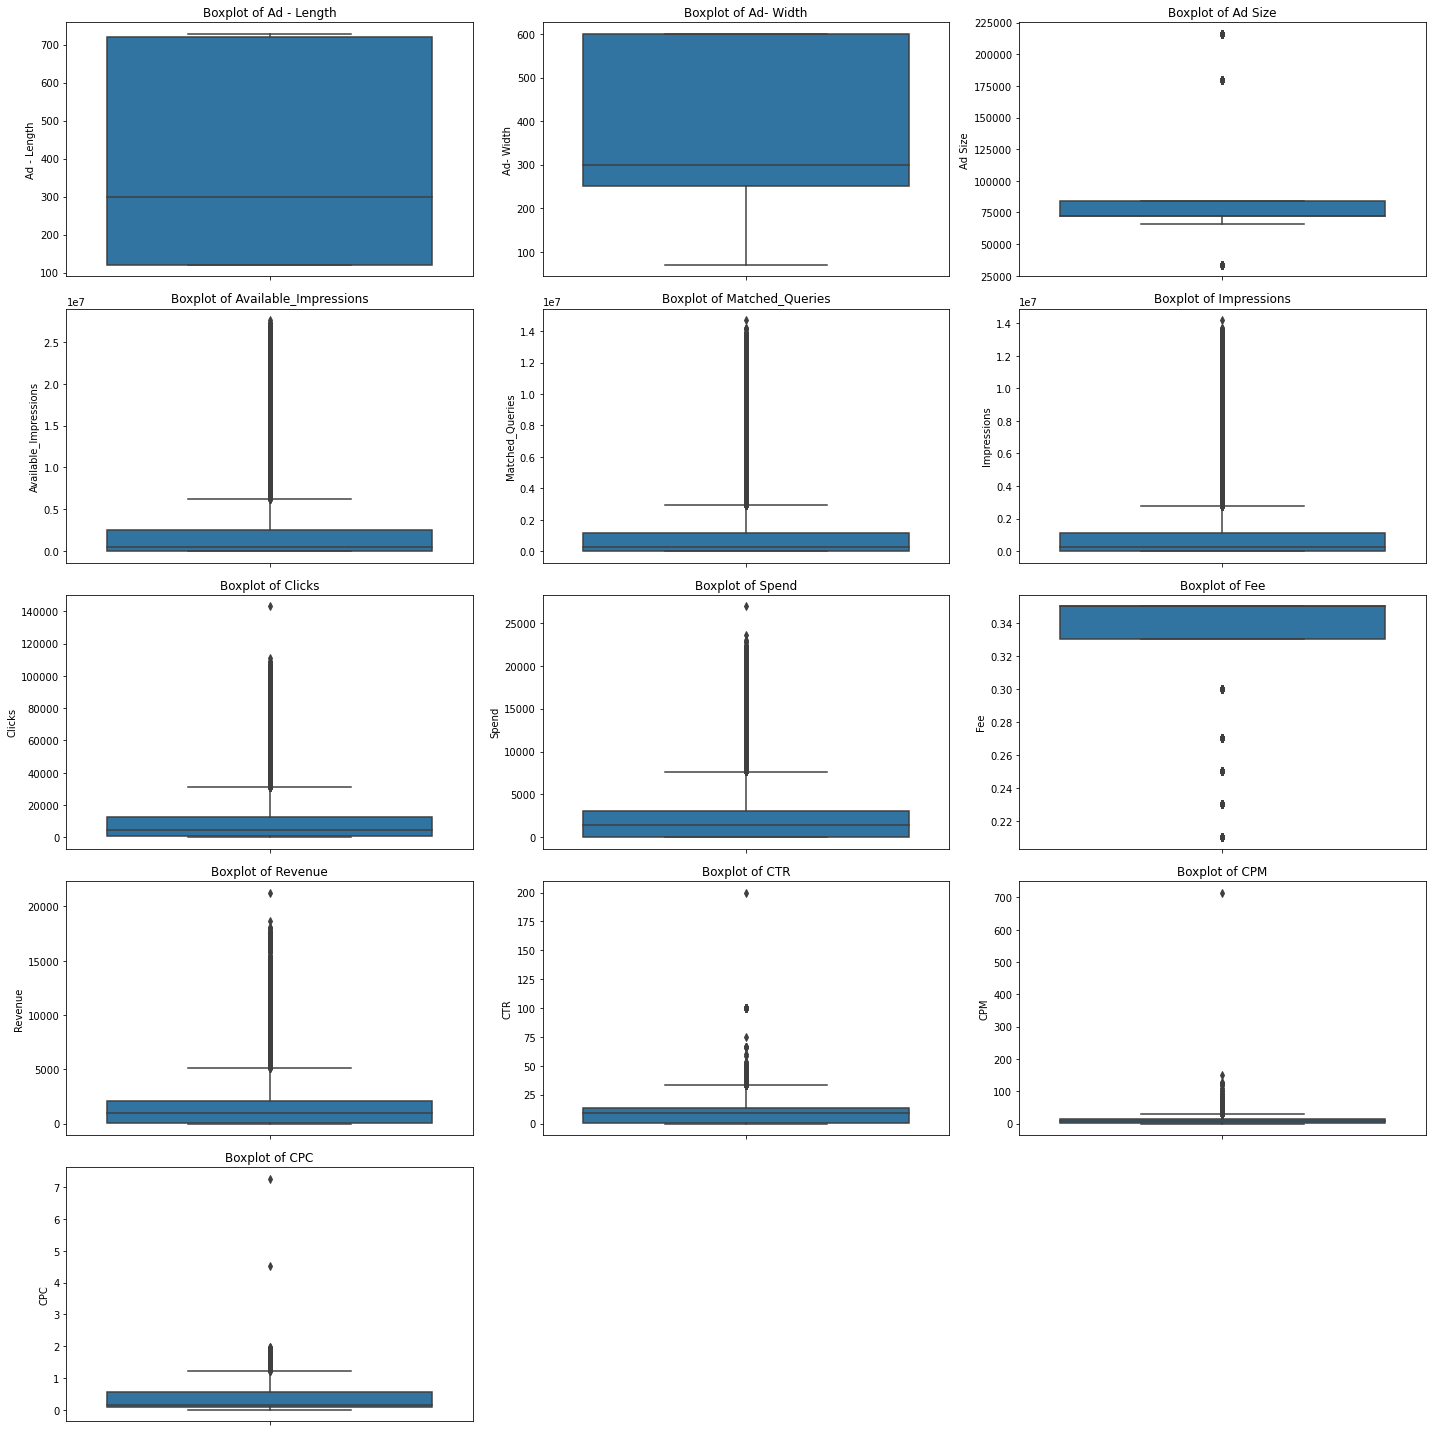

In [24]:
#Check for presence of outliers in each feature
plt.figure(figsize = (20,20))
feature_list = ['Ad - Length', 'Ad- Width', 'Ad Size','Available_Impressions',
       'Matched_Queries', 'Impressions', 'Clicks', 'Spend', 'Fee', 'Revenue',
       'CTR', 'CPM', 'CPC']
for i in range(len(feature_list)):
    plt.subplot(5, 3, i + 1)
    sns.boxplot(y = data[feature_list[i]], data = data)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [25]:
#Define a function which returns the Upper and Lower limit to detect outliers for each feature
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range  

In [26]:
#Cap & floor the values beyond the outlier boundaries
for i in feature_list:
    LL, UL = remove_outlier(data[i])
    data[i] = np.where(data[i] > UL, UL, data[i])
    data[i] = np.where(data[i] < LL, LL, data[i])

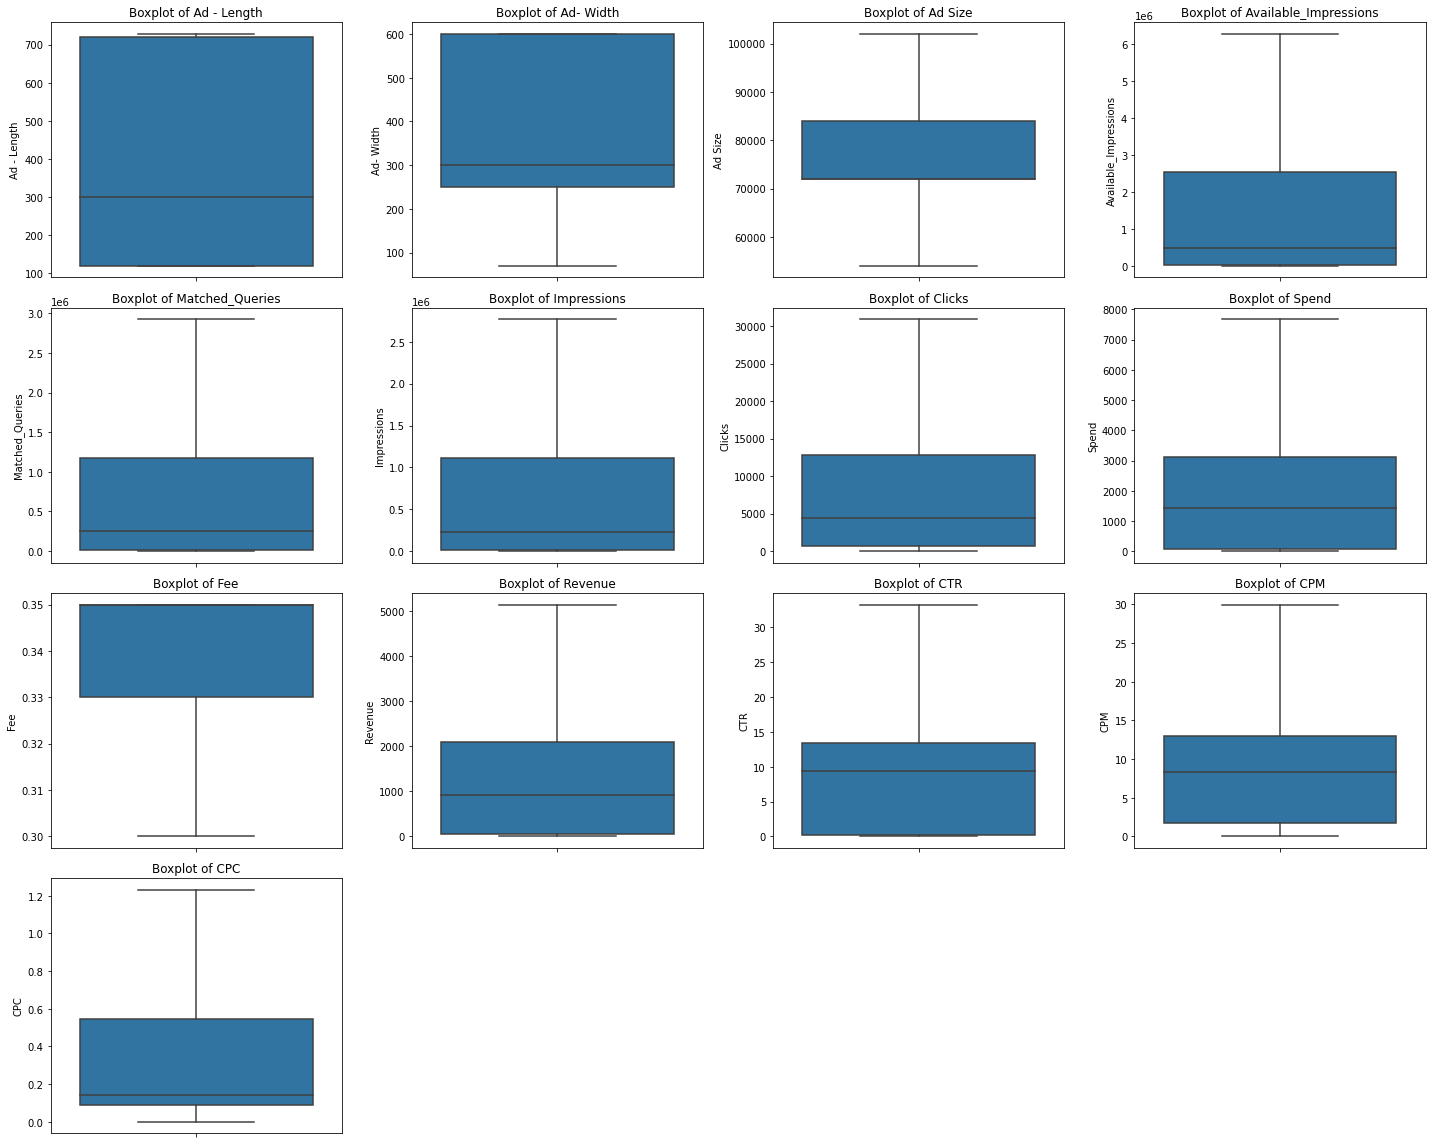

In [27]:
plt.figure(figsize = (20,16))
feature_list = ['Ad - Length', 'Ad- Width', 'Ad Size','Available_Impressions',
       'Matched_Queries', 'Impressions', 'Clicks', 'Spend', 'Fee', 'Revenue',
       'CTR', 'CPM', 'CPC']
for i in range(len(feature_list)):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y = data[feature_list[i]], data = data)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

## 4. Perform z-score scaling and discuss how it affects the speed of the algorithm.

In [28]:
data_new = data[feature_list]

In [29]:
#Scale the data
from scipy.stats import zscore
data_scaled = data_new.apply(zscore)

In [30]:
data_scaled

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,-0.364496,-0.432797,-0.102518,-0.755333,-0.778949,-0.768478,-0.867488,-0.893170,0.535724,-0.880093,-0.958836,-1.194498,-1.042561
1,-0.364496,-0.432797,-0.102518,-0.755345,-0.778988,-0.768516,-0.867488,-0.893170,0.535724,-0.880093,-0.953835,-1.194498,-1.042561
2,-0.364496,-0.432797,-0.102518,-0.754900,-0.778919,-0.768445,-0.867488,-0.893170,0.535724,-0.880093,-0.962218,-1.194498,-1.042561
3,-0.364496,-0.432797,-0.102518,-0.755040,-0.778781,-0.768302,-0.867488,-0.893170,0.535724,-0.880093,-0.971871,-1.194498,-1.042561
4,-0.364496,-0.432797,-0.102518,-0.755610,-0.779030,-0.768560,-0.867488,-0.893170,0.535724,-0.880093,-0.946281,-1.194498,-1.042561
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23061,1.433093,-0.186599,1.652896,-0.756182,-0.779265,-0.768806,-0.867488,-0.893141,0.535724,-0.880066,3.035808,3.162718,-0.821435
23062,1.433093,-0.186599,1.652896,-0.756181,-0.779264,-0.768805,-0.867488,-0.893154,0.535724,-0.880078,3.035808,1.712113,-0.916204
23063,1.433093,-0.186599,1.652896,-0.756182,-0.779265,-0.768806,-0.867488,-0.893150,0.535724,-0.880074,3.035808,3.162718,-0.884614
23064,-1.134891,1.290590,-0.297564,-0.756179,-0.779265,-0.768806,-0.867488,-0.893141,0.535724,-0.880066,3.035808,3.162718,-0.821435


In [31]:
data_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
Ad - Length,23066.0,-4.030447e-15,1.000022,-1.134891,-1.134891,-0.364496,1.433093,1.467332
Ad- Width,23066.0,5.390161e-15,1.000022,-1.319110,-0.432797,-0.186599,1.290590,1.290590
Ad Size,23066.0,-4.156304e-15,1.000022,-1.467840,-0.297564,-0.297564,0.482620,1.652896
Available_Impressions,23066.0,-3.617510e-15,1.000022,-0.756182,-0.740341,-0.528577,0.433059,2.193158
Matched_Queries,23066.0,1.341008e-15,1.000022,-0.779265,-0.761447,-0.527722,0.371498,2.070914
Impressions,23066.0,-1.224345e-15,1.000022,-0.768806,-0.760655,-0.538975,0.366051,2.056111
Clicks,23066.0,1.960656e-15,1.000022,-0.867488,-0.793438,-0.405431,0.468629,2.361729
Spend,23066.0,1.250852e-15,1.000022,-0.893170,-0.858046,-0.305523,0.393932,2.271900
Fee,23066.0,-2.322121e-14,1.000022,-2.222416,-0.567532,0.535724,0.535724,0.535724
Revenue,23066.0,3.136228e-15,1.000022,-0.880093,-0.846474,-0.317607,0.389803,2.244218


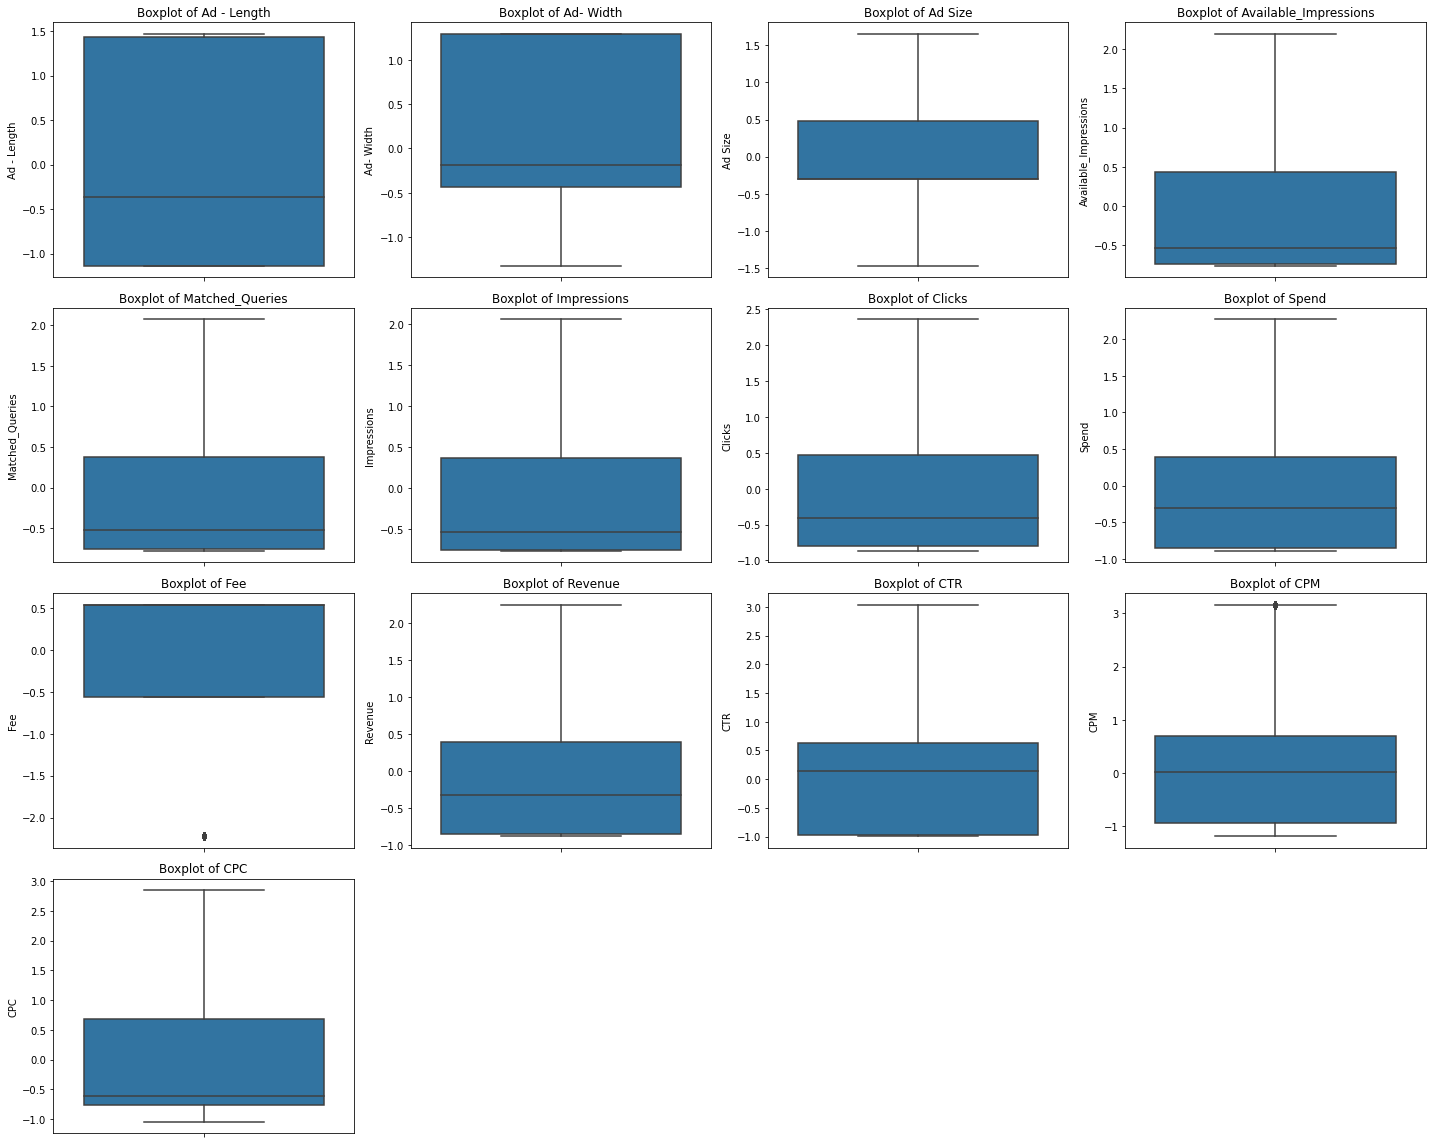

In [32]:
plt.figure(figsize = (20,16))
feature_list =data_scaled.columns
for i in range(len(feature_list)):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y = data_scaled[feature_list[i]], data = data_scaled)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

## 5. Perform Hierarchical by constructing a Dendrogram using WARD and Euclidean distance.

In [42]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [43]:
wardlink = linkage(data_scaled, method = 'ward', metric='euclidean')

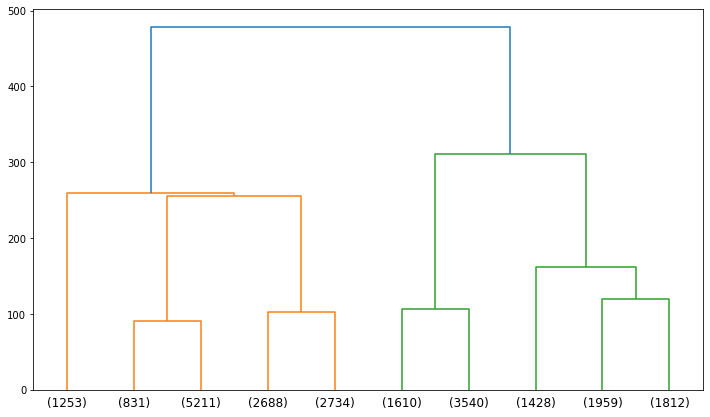

In [44]:
plt.figure(figsize=(12,7))
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

In [45]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(wardlink, 2, criterion='maxclust')
clusters

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

In [46]:
# data['Heirarchial_cluster']=clusters

##  6. Make Elbow plot (up to n=10) and identify optimum number of clusters for k-means algorithm.

In [47]:
from sklearn.cluster import KMeans 

In [48]:
wss =[] 
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(data_scaled)
    wss.append(KM.inertia_)

AttributeError: 'NoneType' object has no attribute 'split'

In [ ]:
print('The within sum of squares values for\n different k values (1 to 10):')
wss

In [ ]:
plt.figure(figsize=(12,7))
plt.xticks(range(0,11))
plt.plot(range(1,11), wss)

Optimum number of clusters would be 5. 

## 7. Print silhouette scores for up to 10 clusters and identify optimum number of clusters.

In [40]:
from sklearn.metrics import silhouette_score

In [41]:
for i in range(2,11):
    k_means = KMeans(n_clusters = i)
    k_means.fit(data_scaled)
    labels = k_means.labels_
    ss=silhouette_score(data_scaled,labels)
    print(f'Silhouette score for {i} clusters = {ss}')

Silhouette score for 2 clusters = 0.38572769619101077
Silhouette score for 3 clusters = 0.3825476915535516
Silhouette score for 4 clusters = 0.45324270552598256
Silhouette score for 5 clusters = 0.5240956940501831
Silhouette score for 6 clusters = 0.5221533662938636
Silhouette score for 7 clusters = 0.5165526421377125
Silhouette score for 8 clusters = 0.47977170756871823
Silhouette score for 9 clusters = 0.4367645559200337
Silhouette score for 10 clusters = 0.4363637504360103


Supports above decision. optimum number of clusters = 5 since silhouette score is maximum.  

## 8. Profile the ads based on optimum number of clusters using silhouette score and your domain understanding [Hint: Group the data by clusters and take sum or mean to identify trends in Clicks, spend, revenue, CPM, CTR, & CPC based on Device Type. Make bar plots].

In [35]:
k_means = KMeans(n_clusters = 5)
k_means.fit(data_scaled)
labels = k_means.labels_

data["KMeans_Cluster"] = labels
data.head(5)

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,KMeans_Cluster
0,2020-9-2-17,Format1,300.0,250.0,75000.0,Inter222,Video,Desktop,Display,1806.0,325.0,323.0,1.0,0.0,0.35,0.0,0.309598,0.0,0.0,1
1,2020-9-2-10,Format1,300.0,250.0,75000.0,Inter227,App,Mobile,Video,1780.0,285.0,285.0,1.0,0.0,0.35,0.0,0.350877,0.0,0.0,1
2,2020-9-1-22,Format1,300.0,250.0,75000.0,Inter222,Video,Desktop,Display,2727.0,356.0,355.0,1.0,0.0,0.35,0.0,0.281690,0.0,0.0,1
3,2020-9-3-20,Format1,300.0,250.0,75000.0,Inter228,Video,Mobile,Video,2430.0,497.0,495.0,1.0,0.0,0.35,0.0,0.202020,0.0,0.0,1
4,2020-9-4-15,Format1,300.0,250.0,75000.0,Inter217,Web,Desktop,Video,1218.0,242.0,242.0,1.0,0.0,0.35,0.0,0.413223,0.0,0.0,1


In [36]:
data['KMeans_Cluster'].value_counts().sort_index()

0    6524
1    6275
2    4676
3    4054
4    1537
Name: KMeans_Cluster, dtype: int64

In [37]:
data.groupby('KMeans_Cluster').mean()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
KMeans_Cluster,,,,,,,,,,,,,
0,143.280809,572.103004,73966.738197,3.209356e+04,1.962406e+04,1.349204e+04,1914.448804,209.162609,0.349988,135.993379,15.784443,14.330063,0.102764
1,421.696255,152.001594,64299.996813,1.810314e+06,8.642623e+05,8.262209e+05,3263.131952,1500.090563,0.349264,977.424163,0.404392,1.788731,0.528129
2,683.825492,303.785287,100775.876818,2.513465e+05,1.375509e+05,1.167714e+05,14127.278203,1252.285569,0.349538,815.541831,13.289690,11.728833,0.090012
3,465.781944,199.148989,72963.936852,5.695405e+06,2.806219e+06,2.671268e+06,11245.754810,5739.327617,0.313281,3878.748366,0.217242,1.573280,0.748699
4,141.454782,572.446324,73686.402082,8.063284e+05,5.668641e+05,4.781485e+05,30572.439330,6546.373195,0.305569,4471.776116,13.752664,15.385753,0.111918


In [38]:
data.columns

Index(['Timestamp', 'InventoryType', 'Ad - Length', 'Ad- Width', 'Ad Size',
       'Ad Type', 'Platform', 'Device Type', 'Format', 'Available_Impressions',
       'Matched_Queries', 'Impressions', 'Clicks', 'Spend', 'Fee', 'Revenue',
       'CTR', 'CPM', 'CPC', 'KMeans_Cluster'],
      dtype='object')

Clicks, spend, revenue, CPM, CTR, & CPC 

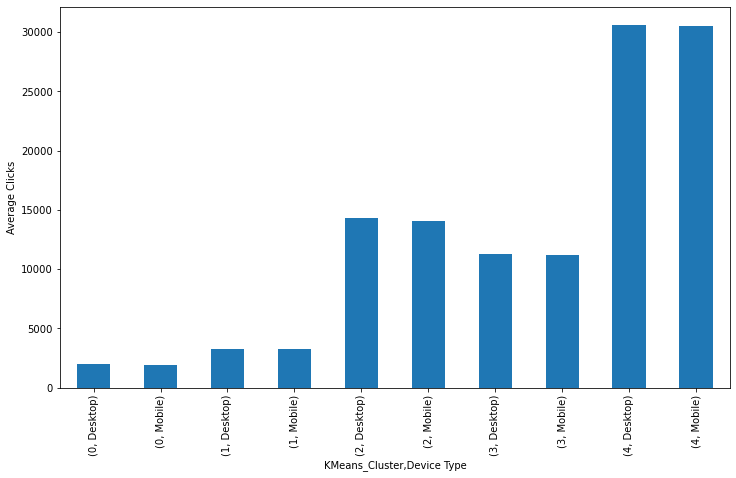

In [39]:
plt.ylabel('Average Clicks')
data.groupby(['KMeans_Cluster','Device Type']).mean()['Clicks'].plot(kind='bar',figsize=(12,7));

In [ ]:
fig,axes=plt.subplots(nrows=2,ncols=3,figsize=(20,15))


data_click=data.groupby(['KMeans_Cluster','Device Type']).mean()[['Clicks']].reset_index()
sns.barplot(data=data_click,x='KMeans_Cluster',y='Clicks',hue='Device Type',palette='husl',ax=axes[0][0])


data_spend=data.groupby(['KMeans_Cluster','Device Type']).mean()[['Spend']].reset_index()
sns.barplot(data=data_spend,x='KMeans_Cluster',y='Spend',hue='Device Type',palette='husl',ax=axes[0][1])


data_revenue=data.groupby(['KMeans_Cluster','Device Type']).mean()[['Revenue']].reset_index()
sns.barplot(data=data_revenue,x='KMeans_Cluster',y='Revenue',hue='Device Type',palette='husl',ax=axes[0][2])


data_cpm=data.groupby(['KMeans_Cluster','Device Type']).mean()[['CPM']].reset_index()
sns.barplot(data=data_cpm,x='KMeans_Cluster',y='CPM',hue='Device Type',palette='husl',ax=axes[1][0])


data_ctr=data.groupby(['KMeans_Cluster','Device Type']).mean()[['CTR']].reset_index()
sns.barplot(data=data_ctr,x='KMeans_Cluster',y='CTR',hue='Device Type',palette='husl',ax=axes[1][1])


data_cpc=data.groupby(['KMeans_Cluster','Device Type']).mean()[['CPC']].reset_index()
sns.barplot(data=data_cpc,x='KMeans_Cluster',y='CPC',hue='Device Type',palette='husl',ax=axes[1][2])



In [ ]:

data.groupby(['KMeans_Cluster','Device Type']).mean()['Spend'].plot(kind='bar',figsize=(12,7))
plt.ylabel('Average Spend');


In [ ]:

data.groupby(['KMeans_Cluster','Device Type']).mean()['Revenue'].plot(kind='bar',figsize=(12,7))
plt.ylabel('Average Revenue');


In [ ]:
data.columns

In [ ]:
data.groupby(['KMeans_Cluster','Device Type']).mean()['CTR'].plot(kind='bar',figsize=(12,7))
plt.ylabel('Average Click Through Rate');

In [ ]:
data.groupby(['KMeans_Cluster','Device Type']).mean()['CPM'].plot(kind='bar',figsize=(12,7));
plt.ylabel('Average Cost per Mille');


In [ ]:
data.groupby(['KMeans_Cluster','Device Type']).mean()['CPC'].plot(kind='bar',figsize=(12,7))
plt.ylabel('Average Cost per Click');


In [ ]:
data.groupby('KMeans_Cluster').sum()

In [ ]:
data.groupby('KMeans_Cluster').mean()

# Part -2 : Principal Component Ananlysis.

## 1. PCA: Read the data and perform basic checks like checking head, info, summary, nulls, and duplicates, etc.


In [3]:
df=pd.read_excel('PCA+India+Data_Census.xlsx')

In [4]:
df.head()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,F_LIT,M_ILL,F_ILL,TOT_WORK_M,TOT_WORK_F,MAINWORK_M,MAINWORK_F,MAIN_CL_M,MAIN_CL_F,MAIN_AL_M,MAIN_AL_F,MAIN_HH_M,MAIN_HH_F,MAIN_OT_M,MAIN_OT_F,MARGWORK_M,MARGWORK_F,MARG_CL_M,MARG_CL_F,MARG_AL_M,MARG_AL_F,MARG_HH_M,MARG_HH_F,MARG_OT_M,MARG_OT_F,MARGWORK_3_6_M,MARGWORK_3_6_F,MARG_CL_3_6_M,MARG_CL_3_6_F,MARG_AL_3_6_M,MARG_AL_3_6_F,MARG_HH_3_6_M,MARG_HH_3_6_F,MARG_OT_3_6_M,MARG_OT_3_6_F,MARGWORK_0_3_M,MARGWORK_0_3_F,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196,3,0,1999,2598,13381,11364,10007,18432,6723,3752,2763,1275,486,235,407,143,78,86,1792,811,3960,2477,619,580,2052,641,142,244,1147,1012,16665,26044,2810,1728,439,343,1372,389,110,198,889,798,1150,749,180,237,680,252,32,46,258,214
1,1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733,7,6,427,517,10513,7891,9072,15211,6982,4200,4628,1733,1098,357,442,108,538,343,2550,925,2354,2467,384,661,915,547,369,627,686,632,12603,18902,1829,1752,261,432,729,399,293,449,546,472,525,715,123,229,186,148,76,178,140,160
2,1,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018,3,6,5806,9723,4534,5840,2012,5124,2775,4800,1940,2923,519,1205,36,71,19,55,1366,1592,835,1877,360,1250,44,157,15,32,416,438,3771,6164,721,1689,316,1161,41,123,15,28,349,377,114,188,44,89,3,34,0,4,67,61
3,1,4,Jammu & Kashmir,Kargil,1320,2784,4206,563,677,0,0,2666,3968,1842,1962,942,2244,1002,1118,491,408,35,102,8,24,9,6,439,276,511,710,135,286,63,176,10,43,303,205,1782,3088,317,463,74,158,50,126,6,33,187,146,194,247,61,128,13,50,4,10,116,59
4,1,5,Jammu & Kashmir,Punch,11654,20591,29981,5157,4587,20,33,7670,10843,13243,13477,7348,16504,5717,7692,2523,2267,743,766,254,237,35,64,1491,1200,3194,5425,1327,2462,1037,1069,62,319,768,1575,14874,22289,2320,3497,862,1419,832,767,38,214,588,1097,874,1928,465,1043,205,302,24,105,180,478


In [5]:
df.tail()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,F_LIT,M_ILL,F_ILL,TOT_WORK_M,TOT_WORK_F,MAINWORK_M,MAINWORK_F,MAIN_CL_M,MAIN_CL_F,MAIN_AL_M,MAIN_AL_F,MAIN_HH_M,MAIN_HH_F,MAIN_OT_M,MAIN_OT_F,MARGWORK_M,MARGWORK_F,MARG_CL_M,MARG_CL_F,MARG_AL_M,MARG_AL_F,MARG_HH_M,MARG_HH_F,MARG_OT_M,MARG_OT_F,MARGWORK_3_6_M,MARGWORK_3_6_F,MARG_CL_3_6_M,MARG_CL_3_6_F,MARG_AL_3_6_M,MARG_AL_3_6_F,MARG_HH_3_6_M,MARG_HH_3_6_F,MARG_OT_3_6_M,MARG_OT_3_6_F,MARGWORK_0_3_M,MARGWORK_0_3_F,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
635,34,636,Puducherry,Mahe,3333,8154,11781,1146,1203,21,30,0,0,6916,10184,1238,1597,3808,1328,3459,997,8,3,27,5,16,3,3408,986,349,331,1,6,3,5,2,2,343,318,4346,10453,317,284,1,6,3,5,2,2,311,271,32,47,0,0,0,0,0,0,32,47
636,34,637,Puducherry,Karaikal,10612,12346,21691,1544,1533,2234,4155,0,0,10292,14225,2054,7466,6458,5286,5619,4104,132,108,645,903,25,173,4817,2920,839,1182,26,30,272,515,11,87,530,550,5888,16405,684,845,23,16,234,385,7,64,420,380,155,337,3,14,38,130,4,23,110,170
637,35,638,Andaman & Nicobar Island,Nicobars,1275,1549,2630,227,225,0,0,1012,1750,1187,1602,362,1028,715,1031,325,534,8,8,1,1,16,38,300,487,390,497,19,9,11,14,78,165,282,309,834,1599,286,363,10,5,9,8,61,118,206,232,104,134,9,4,2,6,17,47,76,77
638,35,639,Andaman & Nicobar Island,North & Middle Andaman,3762,5200,8012,723,664,0,0,28,50,4206,5273,994,2739,2707,2174,2098,1666,553,225,63,28,8,7,1474,1406,609,508,108,163,69,55,4,8,428,282,2493,5838,473,336,84,119,58,34,3,4,328,179,136,172,24,44,11,21,1,4,100,103
639,35,640,Andaman & Nicobar Island,South Andaman,7975,11977,18049,1470,1358,0,0,161,264,10095,13362,1882,4687,6345,5278,5366,4514,255,246,88,67,37,39,4986,4162,979,764,69,71,62,45,13,21,835,627,5632,12771,806,642,63,69,45,28,11,17,687,528,173,122,6,2,17,17,2,4,148,99


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

In [7]:
df.isnull().sum().sum()

0

In [8]:
df.isnull().sum()

State Code        0
Dist.Code         0
State             0
Area Name         0
No_HH             0
TOT_M             0
TOT_F             0
M_06              0
F_06              0
M_SC              0
F_SC              0
M_ST              0
F_ST              0
M_LIT             0
F_LIT             0
M_ILL             0
F_ILL             0
TOT_WORK_M        0
TOT_WORK_F        0
MAINWORK_M        0
MAINWORK_F        0
MAIN_CL_M         0
MAIN_CL_F         0
MAIN_AL_M         0
MAIN_AL_F         0
MAIN_HH_M         0
MAIN_HH_F         0
MAIN_OT_M         0
MAIN_OT_F         0
MARGWORK_M        0
MARGWORK_F        0
MARG_CL_M         0
MARG_CL_F         0
MARG_AL_M         0
MARG_AL_F         0
MARG_HH_M         0
MARG_HH_F         0
MARG_OT_M         0
MARG_OT_F         0
MARGWORK_3_6_M    0
MARGWORK_3_6_F    0
MARG_CL_3_6_M     0
MARG_CL_3_6_F     0
MARG_AL_3_6_M     0
MARG_AL_3_6_F     0
MARG_HH_3_6_M     0
MARG_HH_3_6_F     0
MARG_OT_3_6_M     0
MARG_OT_3_6_F     0
MARGWORK_0_3_M    0


In [9]:
df.duplicated().sum()

0

In [10]:
np.round(df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
State Code,640.0,17.11,9.43,1.0,9.00,18.0,24.00,35.0
Dist.Code,640.0,320.50,184.90,1.0,160.75,320.5,480.25,640.0
No_HH,640.0,51222.87,48135.41,350.0,19484.00,35837.0,68892.00,310450.0
TOT_M,640.0,79940.58,73384.51,391.0,30228.00,58339.0,107918.50,485417.0
TOT_F,640.0,122372.08,113600.72,698.0,46517.75,87724.5,164251.75,750392.0
M_06,640.0,12309.10,11500.91,56.0,4733.75,9159.0,16520.25,96223.0
F_06,640.0,11942.30,11326.29,56.0,4672.25,8663.0,15902.25,95129.0
M_SC,640.0,13820.95,14426.37,0.0,3466.25,9591.5,19429.75,103307.0
F_SC,640.0,20778.39,21727.89,0.0,5603.25,13709.0,29180.00,156429.0
M_ST,640.0,6191.81,9912.67,0.0,293.75,2333.5,7658.00,96785.0


In [11]:
df['State Code'].value_counts()

9     71
23    50
10    38
27    35
8     33
33    32
29    30
21    30
18    27
24    26
20    24
28    23
1     22
6     21
3     20
19    19
22    18
12    16
32    14
5     13
2     12
13    11
14     9
7      9
15     8
17     7
16     4
11     4
34     4
35     3
30     2
25     2
31     1
4      1
26     1
Name: State Code, dtype: int64

In [12]:
df['State'].value_counts()

Uttar Pradesh               71
Madhya Pradesh              50
Bihar                       38
Maharashtra                 35
Rajasthan                   33
Tamil Nadu                  32
Karnataka                   30
Odisha                      30
Assam                       27
Gujarat                     26
Jharkhand                   24
Andhra Pradesh              23
Jammu & Kashmir             22
Haryana                     21
Punjab                      20
West Bengal                 19
Chhattisgarh                18
Arunachal Pradesh           16
Kerala                      14
Uttarakhand                 13
Himachal Pradesh            12
Nagaland                    11
Manipur                      9
NCT of Delhi                 9
Mizoram                      8
Meghalaya                    7
Tripura                      4
Sikkim                       4
Puducherry                   4
Andaman & Nicobar Island     3
Goa                          2
Daman & Diu                  2
Lakshadw

In [13]:
df.groupby('State')['No_HH'].sum().sort_values(ascending=False)

State
Uttar Pradesh               4006871
Maharashtra                 3136214
Andhra Pradesh              3127287
Tamil Nadu                  2964700
West Bengal                 2615284
Karnataka                   2268615
Kerala                      1982663
Bihar                       1974627
Madhya Pradesh              1503764
Gujarat                     1235200
Odisha                      1202073
Rajasthan                   1177124
Assam                        853374
Punjab                       796030
Chhattisgarh                 734616
Jharkhand                    681905
Haryana                      565971
NCT of Delhi                 394821
Uttarakhand                  392668
Himachal Pradesh             305317
Jammu & Kashmir              203645
Meghalaya                    126845
Tripura                      120647
Manipur                       83320
Goa                           79595
Puducherry                    53950
Nagaland                      53423
Mizoram               

In [ ]:
df.columns

In [ ]:
df.head()

##  2  Perform detailed Exploratory analysis by creating certain questions like (i) Which state has highest gender ratio and which has the lowest? (ii) Which district has the highest & lowest gender ratio? (Example Questions). Pick 5 variables out of the given 24 variables below for EDA: No_HH, TOT_M, TOT_F, M_06, F_06, M_SC, F_SC, M_ST, F_ST, M_LIT, F_LIT, M_ILL, F_ILL, TOT_WORK_M, TOT_WORK_F, MAINWORK_M, MAINWORK_F, MAIN_CL_M, MAIN_CL_F, MAIN_AL_M, MAIN_AL_F, MAIN_HH_M, MAIN_HH_F, MAIN_OT_M, MAIN_OT_F



In [ ]:
#delete
df2b=df.groupby('State')[['TOT_WORK_M','TOT_WORK_F']].sum()
df2b['Gender_Ratio']=df2b['TOT_WORK_M']/df2b['TOT_WORK_F']
df2b.reset_index(inplace=True)
df2b.sort_values(by='Gender_Ratio',ascending=False)


In [ ]:
#delete
plt.figure(figsize=(15,7))
plt.xticks(rotation=90)
sns.barplot(data=df2b, x='State',y='Gender_Ratio',order=df2b.sort_values(by='Gender_Ratio',ascending=False)['State'].values)

In [61]:
df.columns

Index(['State Code', 'Dist.Code', 'State', 'Area Name', 'No_HH', 'TOT_M',
       'TOT_F', 'M_06', 'F_06', 'M_SC', 'F_SC', 'M_ST', 'F_ST', 'M_LIT',
       'F_LIT', 'M_ILL', 'F_ILL', 'TOT_WORK_M', 'TOT_WORK_F', 'MAINWORK_M',
       'MAINWORK_F', 'MAIN_CL_M', 'MAIN_CL_F', 'MAIN_AL_M', 'MAIN_AL_F',
       'MAIN_HH_M', 'MAIN_HH_F', 'MAIN_OT_M', 'MAIN_OT_F', 'MARGWORK_M',
       'MARGWORK_F', 'MARG_CL_M', 'MARG_CL_F', 'MARG_AL_M', 'MARG_AL_F',
       'MARG_HH_M', 'MARG_HH_F', 'MARG_OT_M', 'MARG_OT_F', 'MARGWORK_3_6_M',
       'MARGWORK_3_6_F', 'MARG_CL_3_6_M', 'MARG_CL_3_6_F', 'MARG_AL_3_6_M',
       'MARG_AL_3_6_F', 'MARG_HH_3_6_M', 'MARG_HH_3_6_F', 'MARG_OT_3_6_M',
       'MARG_OT_3_6_F', 'MARGWORK_0_3_M', 'MARGWORK_0_3_F', 'MARG_CL_0_3_M',
       'MARG_CL_0_3_F', 'MARG_AL_0_3_M', 'MARG_AL_0_3_F', 'MARG_HH_0_3_M',
       'MARG_HH_0_3_F', 'MARG_OT_0_3_M', 'MARG_OT_0_3_F', 'NON_WORK_M',
       'NON_WORK_F'],
      dtype='object')

In [64]:
eda=['Dist.Code', 'State', 'Area Name','No_HH', 'TOT_M', 'TOT_F', 'MAIN_HH_M', 'MAIN_HH_F']

In [65]:
df_eda=df[eda]
df_eda.head()

,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,MAIN_HH_M,MAIN_HH_F
0,1,Jammu & Kashmir,Kupwara,7707,23388,29796,78,86
1,2,Jammu & Kashmir,Badgam,6218,19585,23102,538,343
2,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,19,55
3,4,Jammu & Kashmir,Kargil,1320,2784,4206,9,6
4,5,Jammu & Kashmir,Punch,11654,20591,29981,35,64


### a. Which state has highest and lowest number of house holds? 

In [121]:
pd.set_option('display.max_rows',10)

In [122]:
df_eda.groupby('State').sum()[['No_HH']].reset_index().sort_values(by='No_HH',ascending=False)

,State,No_HH
32,Uttar Pradesh,4006871
19,Maharashtra,3136214
1,Andhra Pradesh,3127287
30,Tamil Nadu,2964700
34,West Bengal,2615284
...,...,...
29,Sikkim,16690
0,Andaman & Nicobar Island,13012
8,Daman & Diu,7455
17,Lakshadweep,4445


<AxesSubplot:xlabel='State', ylabel='No_HH'>

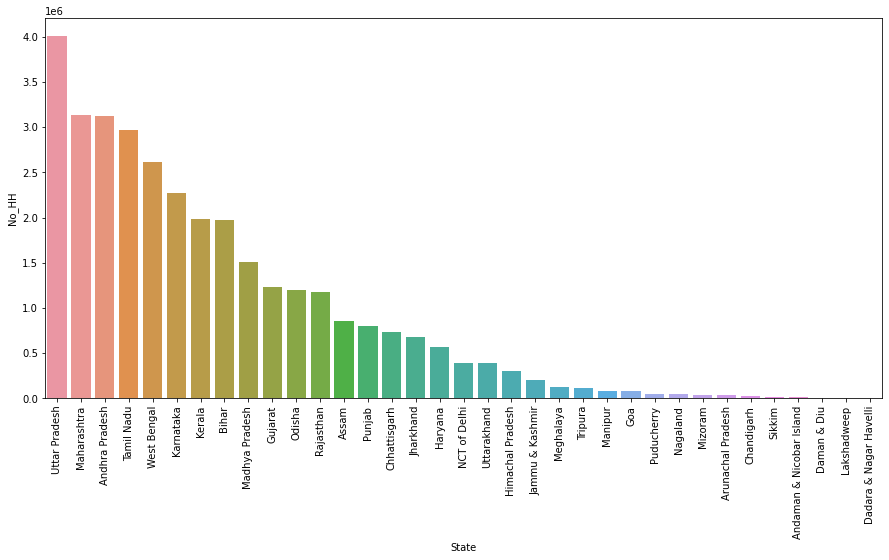

In [123]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=90)
sns.barplot(data=df_eda.groupby('State').sum()[['No_HH']].reset_index().sort_values(by='No_HH',ascending=False), x='State',y='No_HH')


### b. Which state has highest and lowest gender ratio? 


In [124]:
df_2b=df_eda.groupby('State').sum()[['TOT_M','TOT_F']].reset_index()
df_2b['Gender_ratio']=df_2b['TOT_F']/df_2b['TOT_M']
df_2b.sort_values(by='Gender_ratio',ascending=False)

,State,TOT_M,TOT_F,Gender_ratio
1,Andhra Pradesh,3274363,6097235,1.862113
30,Tamil Nadu,3074009,5610310,1.825079
6,Chhattisgarh,838404,1526592,1.820831
2,Arunachal Pradesh,50582,88066,1.741054
25,Odisha,1460031,2536980,1.737621
...,...,...,...,...
21,Meghalaya,268036,356355,1.329504
32,Uttar Pradesh,9043969,12023885,1.329492
23,NCT of Delhi,833414,1075266,1.290194
11,Haryana,1167816,1498873,1.283484


<AxesSubplot:xlabel='State', ylabel='Gender_ratio'>

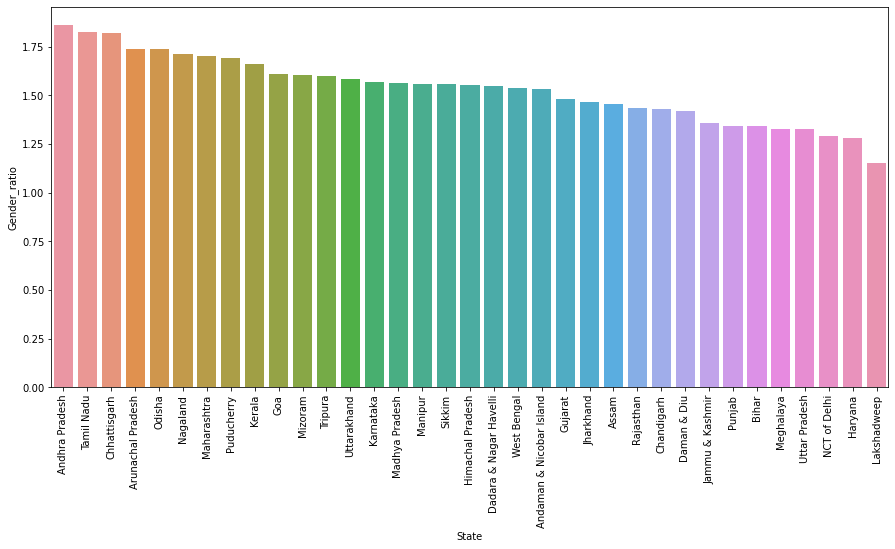

In [125]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=90)
sns.barplot(data=df_2b.sort_values(by='Gender_ratio',ascending=False), x='State',y='Gender_ratio')


### c. In Karnataka, which district has the most and the least number of female population? 

In [126]:
df_2c=df_eda[df_eda['State']=='Karnataka'][['Area Name','TOT_F']]
df_2c

,Area Name,TOT_F
554,Belgaum,334223
555,Bagalkot,177495
556,Bijapur,148997
557,Bidar,108480
558,Raichur,189895
...,...,...
579,Yadgir,116541
580,Kolar,108595
581,Chikkaballapura,88696
582,Bangalore Rural,78317


In [129]:
df_2c.sort_values(by='TOT_F',ascending=False)

,Area Name,TOT_F
571,Bangalore,664595
554,Belgaum,334223
574,Dakshina Kannada,286313
576,Mysore,281838
568,Udupi,262526
...,...,...
560,Gadag,105190
569,Chikmagalur,97951
581,Chikkaballapura,88696
582,Bangalore Rural,78317


<AxesSubplot:xlabel='Area Name', ylabel='TOT_F'>

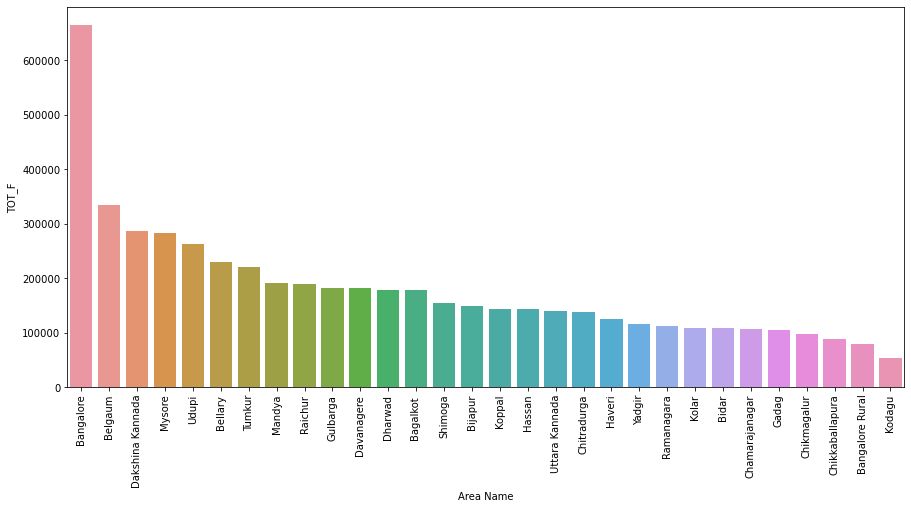

In [131]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=90)
sns.barplot(data=df_2c.sort_values(by='TOT_F',ascending=False), x='Area Name',y='TOT_F')

### d. Which state has most number of house hold industry workers

In [98]:
df_eda.columns

Index(['Dist.Code', 'State', 'Area Name', 'No_HH', 'TOT_M', 'TOT_F',
       'MAIN_HH_M', 'MAIN_HH_F'],
      dtype='object')

In [102]:
df_2d=df_eda
df_2d['HH_Workers']=df_2d['MAIN_HH_M']+df_2d['MAIN_HH_F']

C:\Users\Admin\AppData\Local\Temp\ipykernel_8340\367506222.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2d['HH_Workers']=df_2d['MAIN_HH_M']+df_2d['MAIN_HH_F']


In [132]:
df_2d.groupby('State').sum()[['HH_Workers']].reset_index().sort_values(by='HH_Workers',ascending=False)

,State,HH_Workers
32,Uttar Pradesh,263928
34,West Bengal,190047
1,Andhra Pradesh,149919
30,Tamil Nadu,141510
15,Karnataka,126662
...,...,...
29,Sikkim,320
0,Andaman & Nicobar Island,145
7,Dadara & Nagar Havelli,110
8,Daman & Diu,67


In [ ]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=90)
sns.barplot(data=df_2c.sort_values(by='TOT_F',ascending=False), x='Area Name',y='TOT_F')

### e. What percentage of population is working in house hold industries? What is the  gender ratio of  the workers in the house hold industry

In [108]:
#total population
a=df_eda['TOT_F'].sum()+df_eda['TOT_M'].sum()
a

129480103

In [109]:
# number of people working in house hold industries
b=df_eda['MAIN_HH_F'].sum()+df_eda['MAIN_HH_M'].sum()
b

1449387

In [111]:
#percentage of people working in house hold industries
b/a*100

1.1193897490180402

In [112]:
#gender ratio of workers in household industry
df_eda['MAIN_HH_F'].sum()/df_eda['MAIN_HH_M'].sum()

1.5621486604017734

### f. How is number of households and number of house hold industries related ?

In [113]:
df_eda.columns

Index(['Dist.Code', 'State', 'Area Name', 'No_HH', 'TOT_M', 'TOT_F',
       'MAIN_HH_M', 'MAIN_HH_F', 'HH_Workers'],
      dtype='object')

In [115]:
df_eda['Total_hh_workers']=df_eda['MAIN_HH_F']+df_eda['MAIN_HH_M']

C:\Users\Admin\AppData\Local\Temp\ipykernel_8340\3885876791.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eda['Total_hh_workers']=df_eda['MAIN_HH_F']+df_eda['MAIN_HH_M']


<AxesSubplot:xlabel='No_HH', ylabel='Total_hh_workers'>

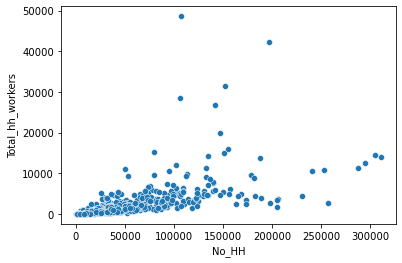

In [120]:
sns.scatterplot(data=df_eda, x='No_HH',y='Total_hh_workers')

## 3 - PCA: We choose not to treat outliers for this case. Do you think that treating outliers for this case is necessary?


In [17]:
df.columns

Index(['State Code', 'Dist.Code', 'State', 'Area Name', 'No_HH', 'TOT_M',
       'TOT_F', 'M_06', 'F_06', 'M_SC', 'F_SC', 'M_ST', 'F_ST', 'M_LIT',
       'F_LIT', 'M_ILL', 'F_ILL', 'TOT_WORK_M', 'TOT_WORK_F', 'MAINWORK_M',
       'MAINWORK_F', 'MAIN_CL_M', 'MAIN_CL_F', 'MAIN_AL_M', 'MAIN_AL_F',
       'MAIN_HH_M', 'MAIN_HH_F', 'MAIN_OT_M', 'MAIN_OT_F', 'MARGWORK_M',
       'MARGWORK_F', 'MARG_CL_M', 'MARG_CL_F', 'MARG_AL_M', 'MARG_AL_F',
       'MARG_HH_M', 'MARG_HH_F', 'MARG_OT_M', 'MARG_OT_F', 'MARGWORK_3_6_M',
       'MARGWORK_3_6_F', 'MARG_CL_3_6_M', 'MARG_CL_3_6_F', 'MARG_AL_3_6_M',
       'MARG_AL_3_6_F', 'MARG_HH_3_6_M', 'MARG_HH_3_6_F', 'MARG_OT_3_6_M',
       'MARG_OT_3_6_F', 'MARGWORK_0_3_M', 'MARGWORK_0_3_F', 'MARG_CL_0_3_M',
       'MARG_CL_0_3_F', 'MARG_AL_0_3_M', 'MARG_AL_0_3_F', 'MARG_HH_0_3_M',
       'MARG_HH_0_3_F', 'MARG_OT_0_3_M', 'MARG_OT_0_3_F', 'NON_WORK_M',
       'NON_WORK_F'],
      dtype='object')

In [18]:
cat_col=['State', 'Area Name','State Code', 'Dist.Code']

In [19]:
df_num=df.drop(cat_col,axis=1)

In [20]:
df_num_check=df_num

In [21]:
df_num.shape

(640, 57)

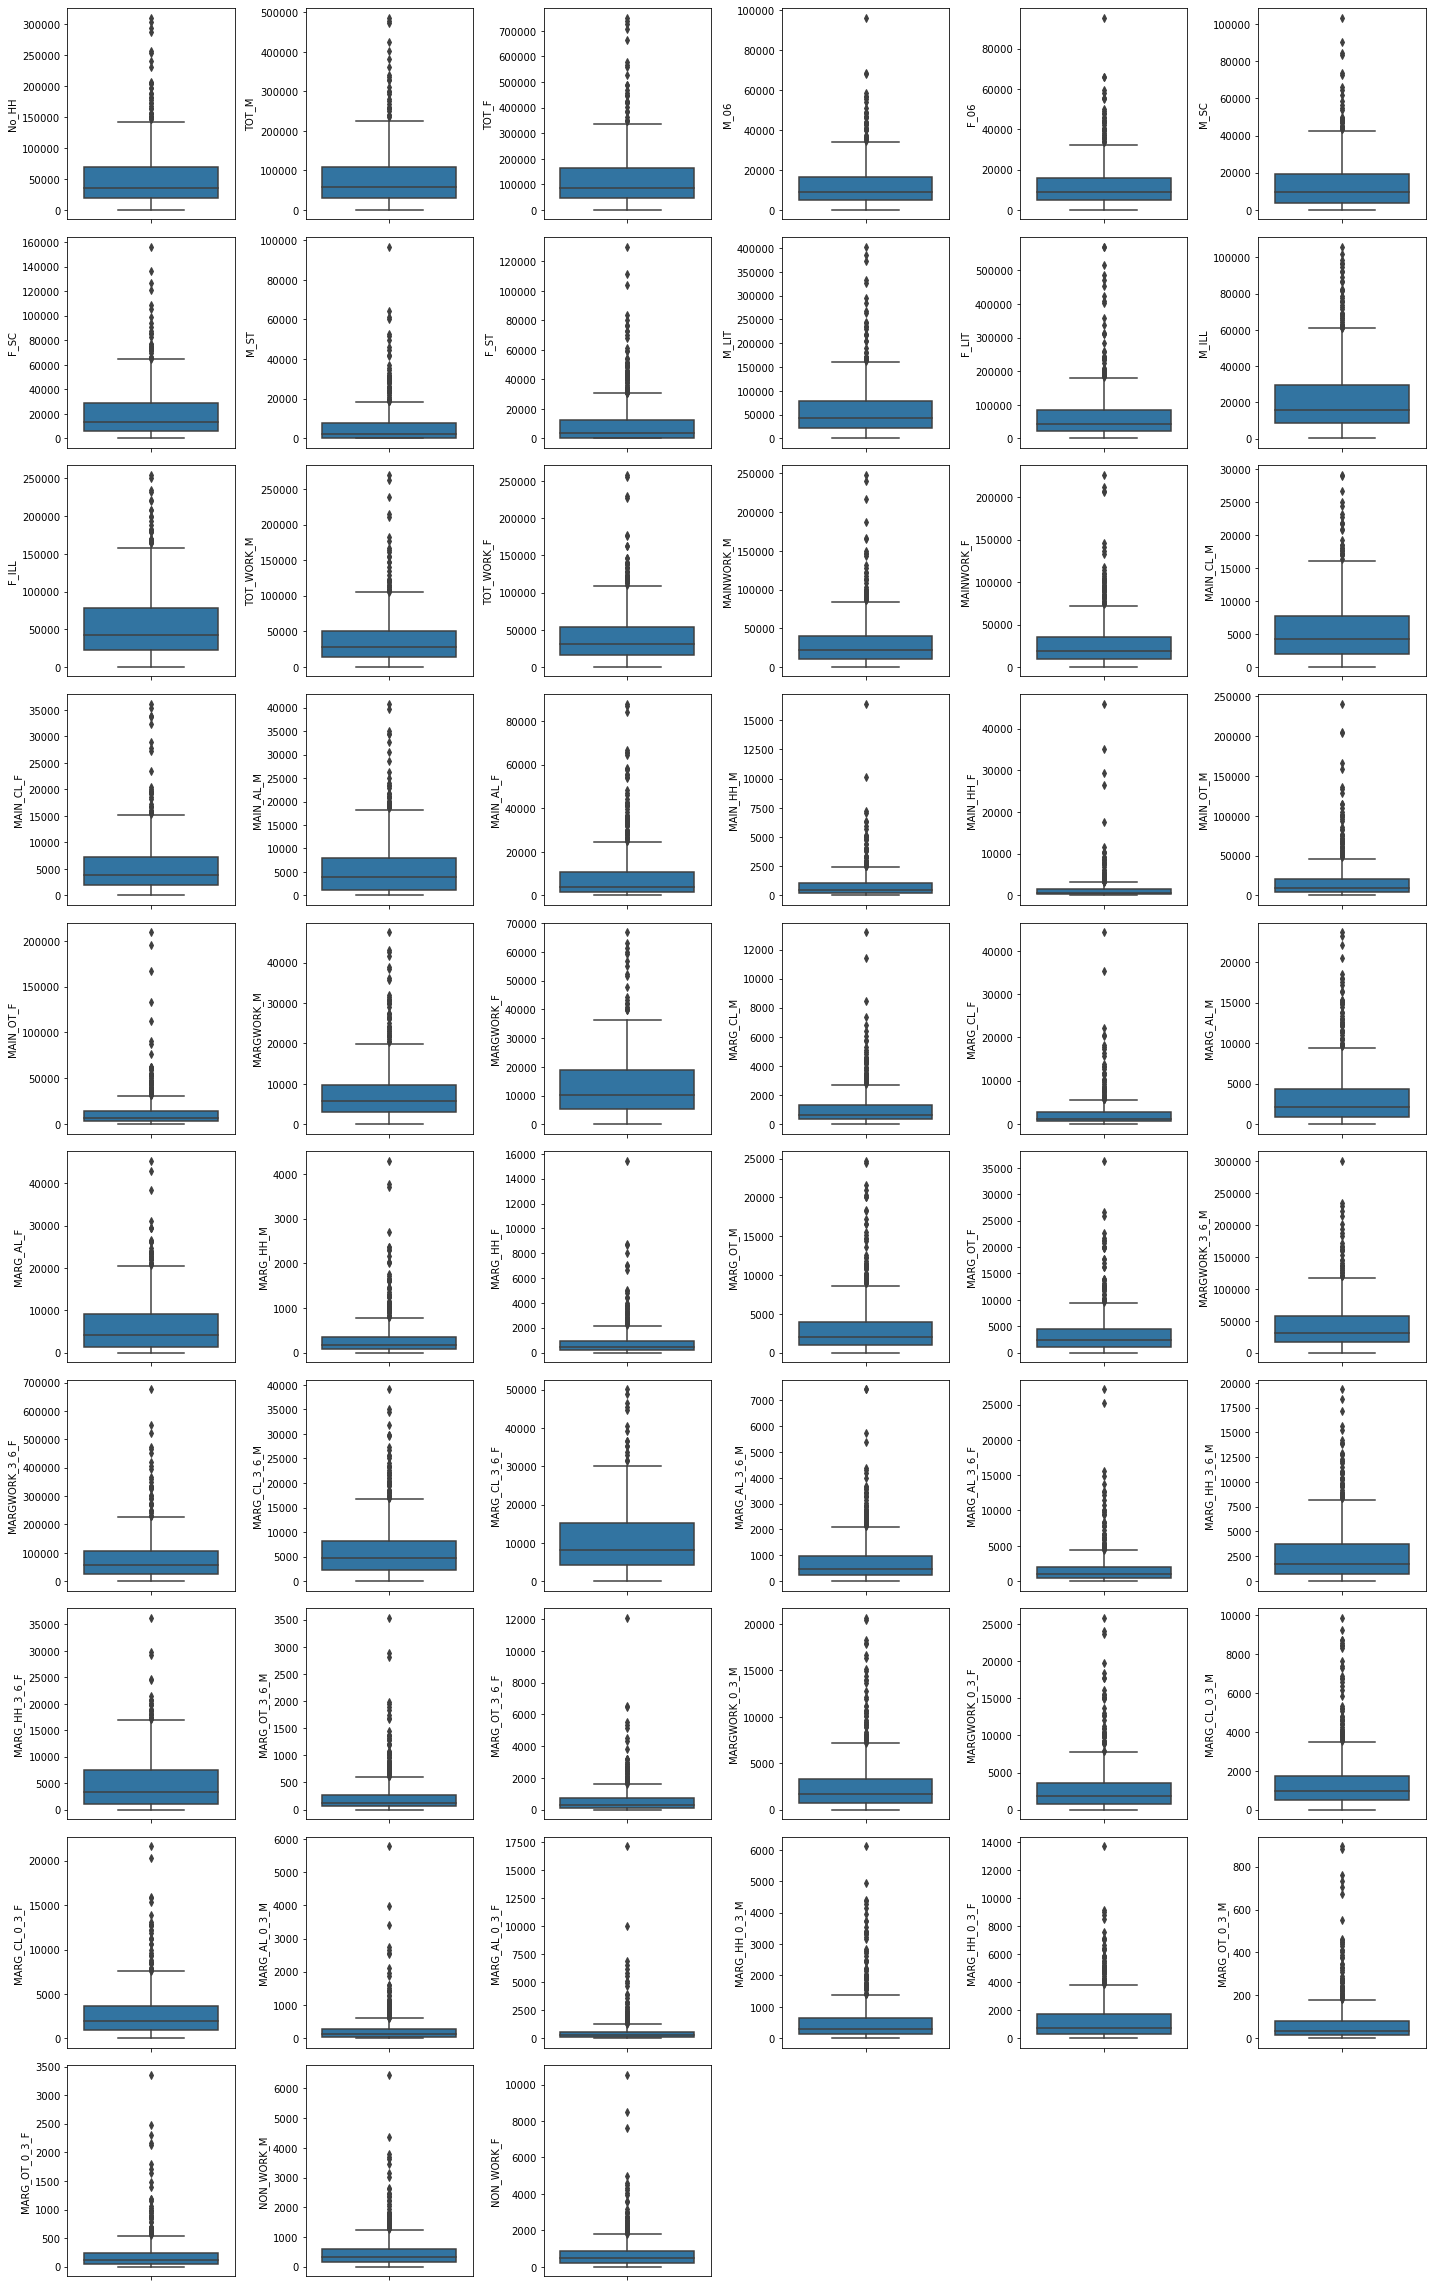

In [143]:
plt.figure(figsize=(20,35))
for i in range(len(df_num.columns)):
    plt.subplot(11,6,i+1)
    sns.boxplot(data=df_num, y = df_num.columns[i])
    plt.tight_layout()

In [ ]:
#Define a function which returns the Upper and Lower limit to detect outliers for each feature
# def remove_outlier(col):
 #   Q1,Q3=col.quantile([0.25,0.75])
  #  IQR=Q3-Q1
   # lower_range= Q1-(1.5 * IQR)
    #upper_range= Q3+(1.5 * IQR)
    #return lower_range, upper_range 

In [ ]:
#Cap & floor the values beyond the outlier boundaries
#for i in df_num.columns:
 #   LL, UL = remove_outlier(df_num[i])
  #  df_num[i] = np.where(df_num[i] > UL, UL, df_num[i])
   # df_num[i] = np.where(df_num[i] < LL, LL, df_num[i])

## 4 - PCA: Scale the Data using z-score method. Does scaling have any impact on outliers? Compare boxplots before and after scaling and comment.


In [22]:
from scipy.stats import zscore

In [23]:
df_scaled_check=df_num_check.apply(zscore)

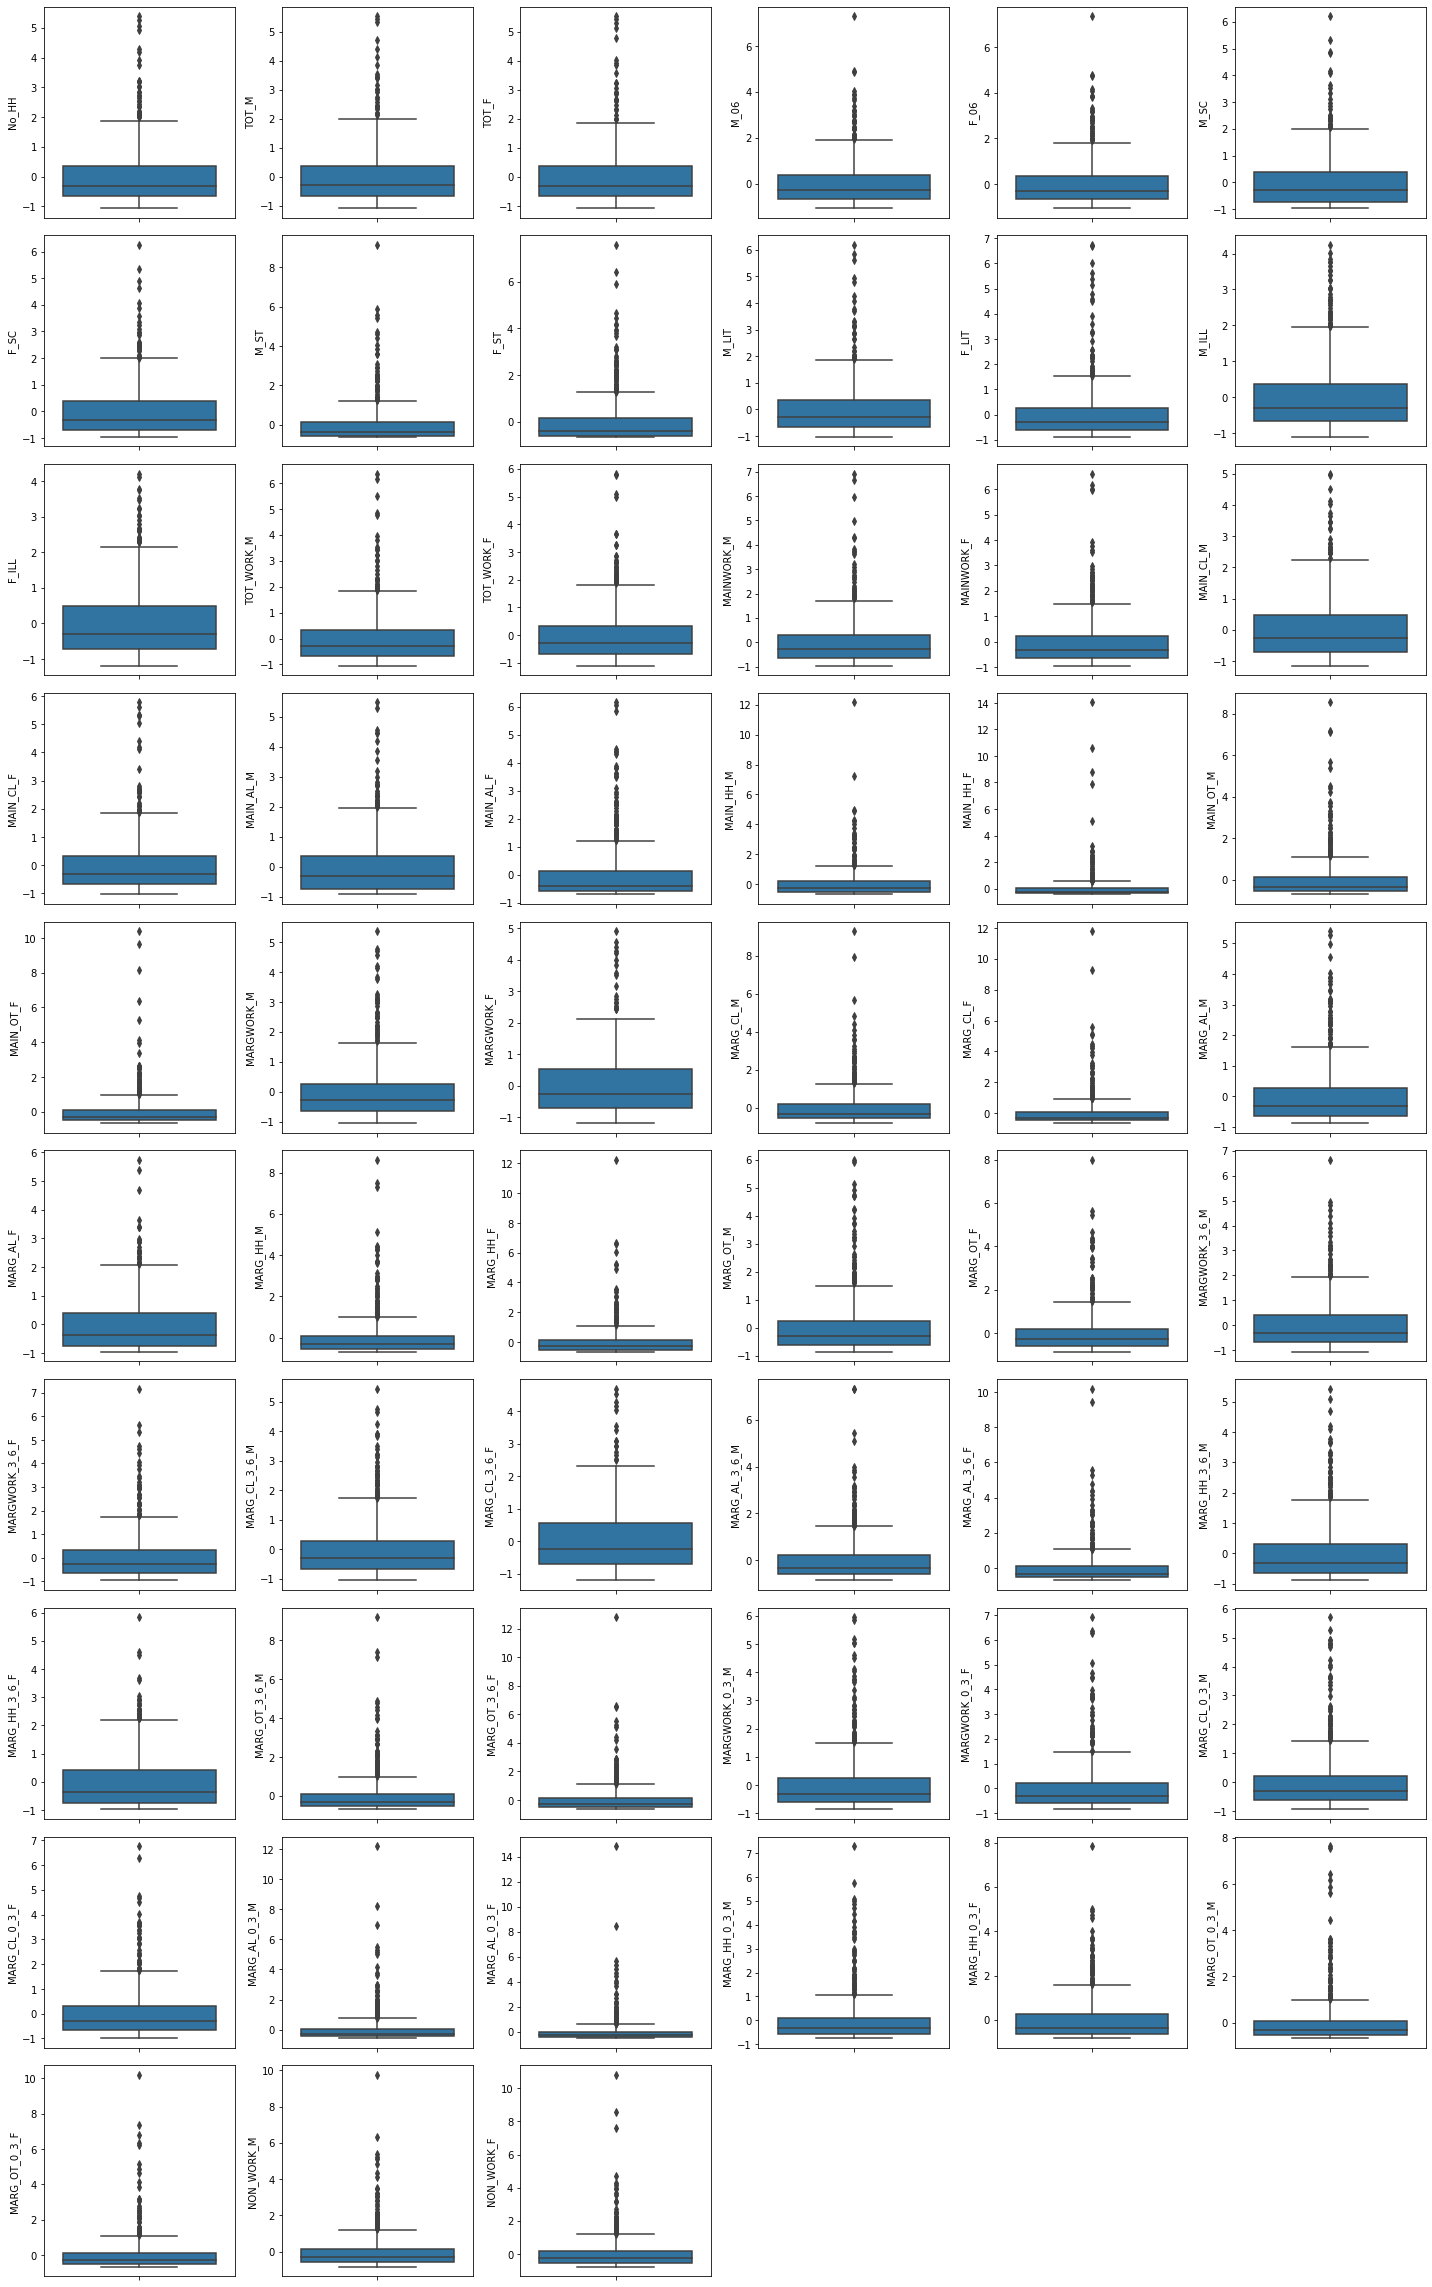

In [144]:
#cheking if scaling has any ipact on the outliers.
plt.figure(figsize=(20,35))
for i in range(len(df_scaled_check.columns)):
    plt.subplot(11,6,i+1)
    sns.boxplot(data=df_scaled_check, y=df_scaled_check.columns[i])
    plt.tight_layout()

### Even after scaling we see outliers in all features. Scaling doesnot affect outliers in any way.

In [24]:
df_scaled=df_num.apply(zscore)

In [133]:
df_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
No_HH,640.0,7.736867e-17,1.000782,-1.057697,-0.659882,-0.319887,0.367358,5.389586
TOT_M,640.0,-1.864828e-16,1.000782,-1.084858,-0.677956,-0.294592,0.381549,5.529690
TOT_F,640.0,-2.983724e-17,1.000782,-1.071906,-0.668250,-0.305233,0.368945,5.532633
M_06,640.0,-2.654127e-17,1.000782,-1.066236,-0.659189,-0.274114,0.366445,7.301993
F_06,640.0,2.081668e-18,1.000782,-1.050264,-0.642376,-0.289756,0.349898,7.350309
...,...,...,...,...,...,...,...,...
MARG_HH_0_3_F,640.0,-1.247266e-16,1.000782,-0.816489,-0.628374,-0.363877,0.263436,7.840581
MARG_OT_0_3_M,640.0,-2.515349e-17,1.000782,-0.662068,-0.532213,-0.337432,0.070681,7.639320
MARG_OT_0_3_F,640.0,-3.053113e-17,1.000782,-0.648604,-0.509670,-0.283498,0.126843,10.188272
NON_WORK_M,640.0,-5.741935e-17,1.000782,-0.835916,-0.572036,-0.301600,0.154863,9.745505


## 5 - PCA: Perform all the required steps for PCA (use sklearn only) Create the covariance Matrix Get eigen values and eigen vector.


In [ ]:
#incomplete. need to create covariance matrix

Required steps for PCA:

1. Treat Outliers ---- not doing

2. Scaling

3. Check for correlations. 

4. Confirm the adequacy of the data

5. PCA

6. Eigen vectors

7. Eigen values.

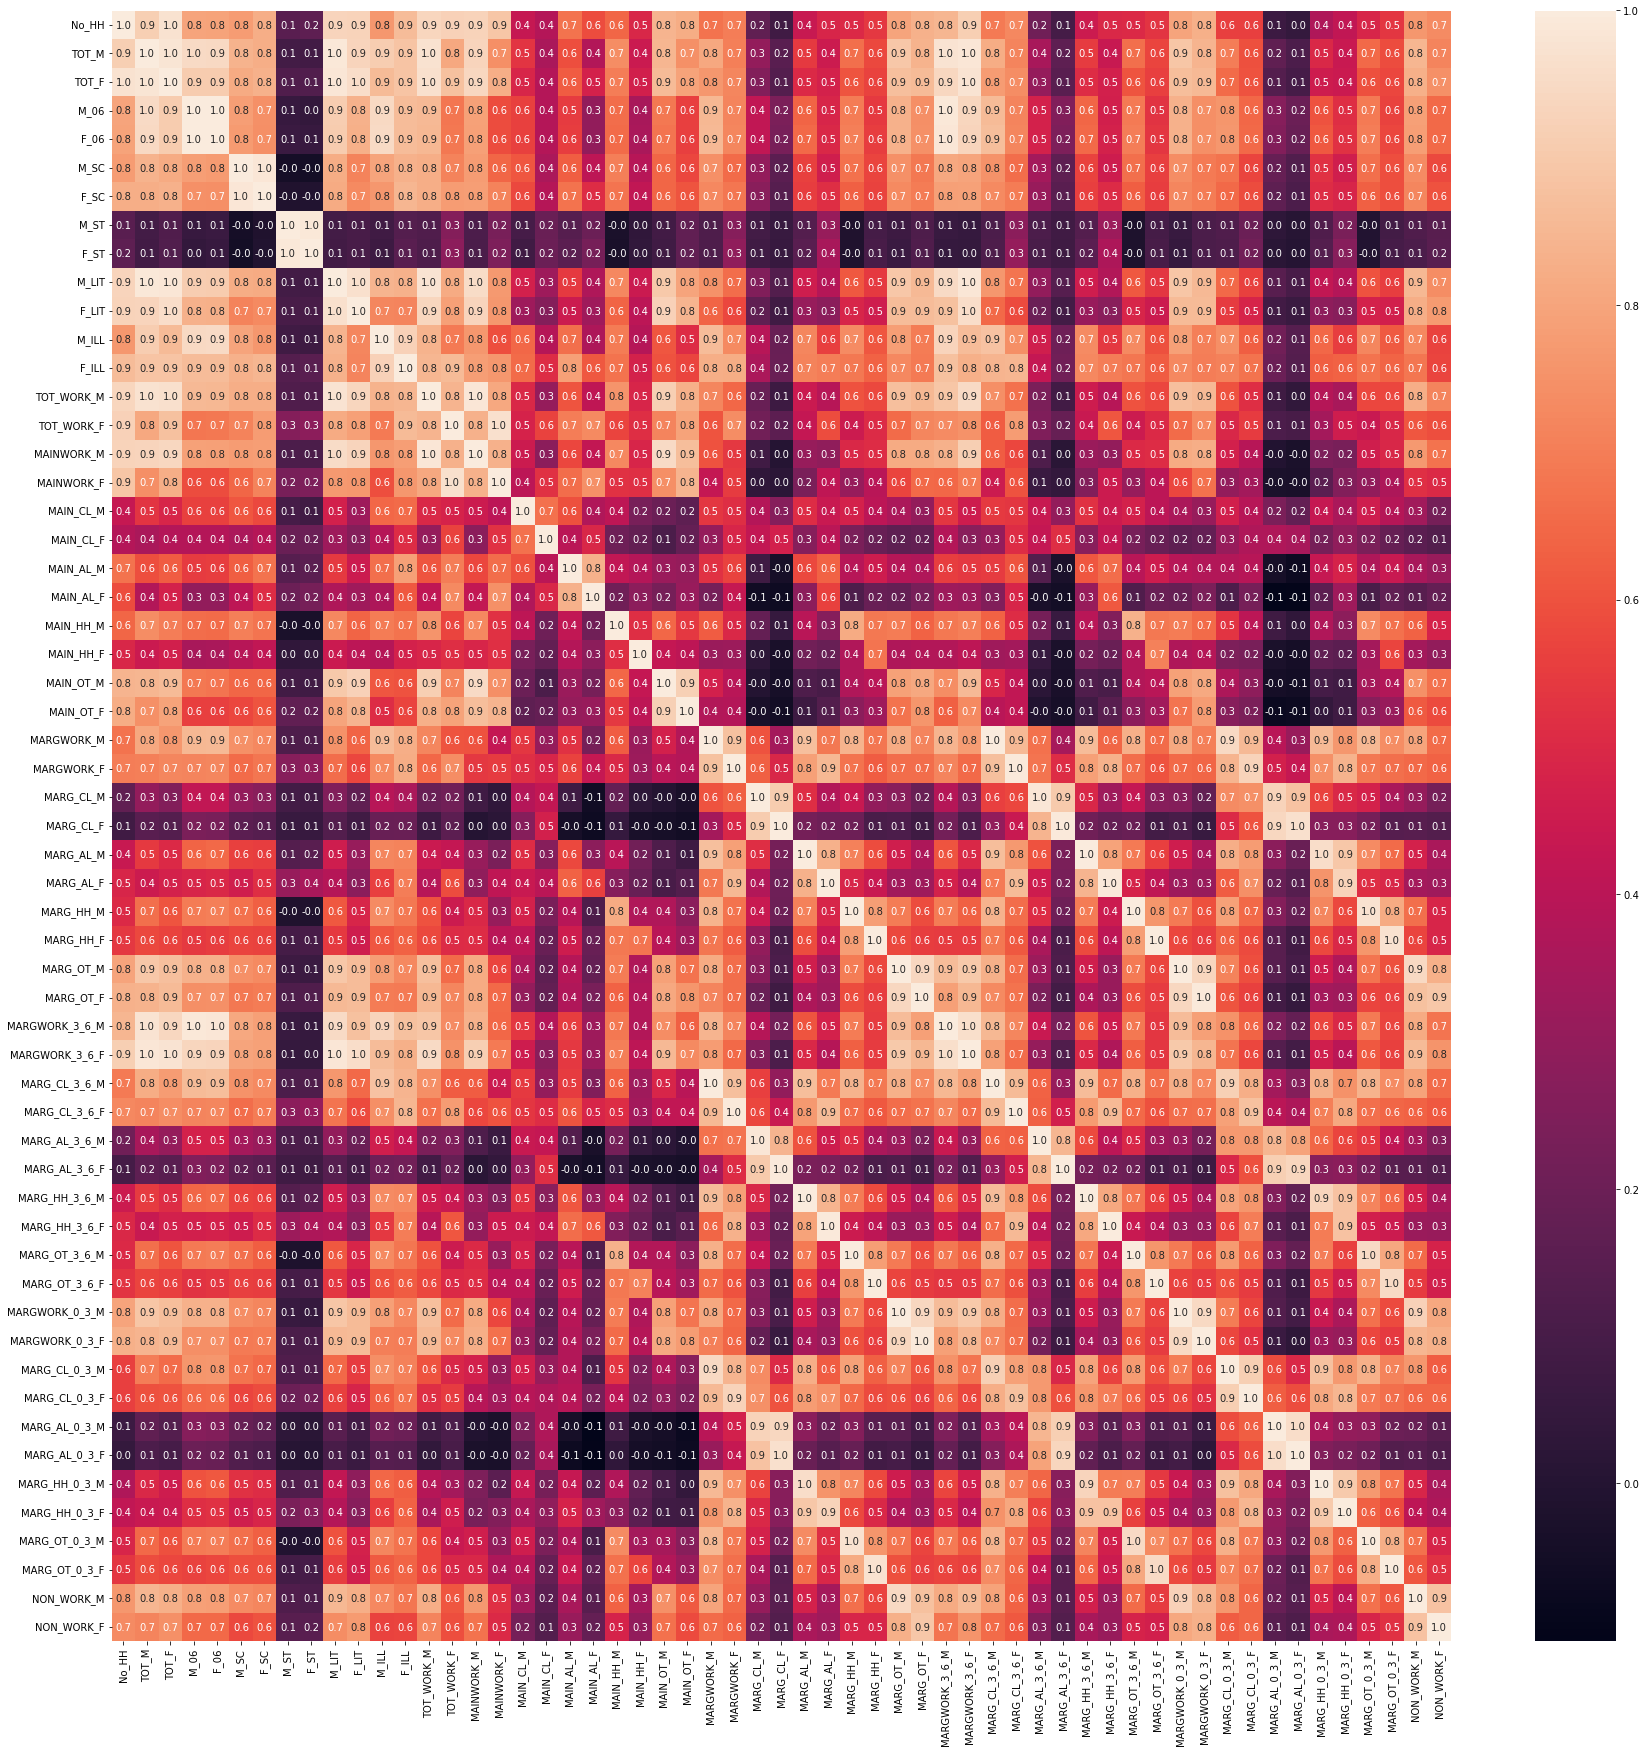

In [146]:
#Check for presence of correlations
plt.figure(figsize = (30,30))
sns.heatmap(df_scaled.corr(), annot=True,fmt='.1f');

### Bartlett Test of sphericity
 
H0: Correlations are not significant, 

H1: There are significant correlations

Reject H0 if p-value < 0.05

In [26]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_scaled)
p_value


#p-value is 0 < alpha. hence we can reject null hypothesis. 
#There is significant correlations in the data hence we can proceed with PCA

C:\Users\Admin\anaconda3\lib\site-packages\factor_analyzer\factor_analyzer.py:108: RuntimeWarning: divide by zero encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)


0.0

### Kaiser-Meyer-Olkin Test

Confirm the adequacy of sample size. 

Note: Above 0.7 is good, below 0.5 is not acceptable

In [27]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_scaled)
kmo_model

#this is >0.7. there is adequate sample to continue with pca.

#the value is greater than 0.7. hence we can proceed with PCA

C:\Users\Admin\anaconda3\lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


0.803988993278217

In [43]:
#covariance matrix
np.round(df_scaled.cov(),2)

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,F_LIT,M_ILL,F_ILL,TOT_WORK_M,TOT_WORK_F,MAINWORK_M,MAINWORK_F,MAIN_CL_M,MAIN_CL_F,MAIN_AL_M,MAIN_AL_F,MAIN_HH_M,MAIN_HH_F,MAIN_OT_M,MAIN_OT_F,MARGWORK_M,MARGWORK_F,MARG_CL_M,MARG_CL_F,MARG_AL_M,MARG_AL_F,MARG_HH_M,MARG_HH_F,MARG_OT_M,MARG_OT_F,MARGWORK_3_6_M,MARGWORK_3_6_F,MARG_CL_3_6_M,MARG_CL_3_6_F,MARG_AL_3_6_M,MARG_AL_3_6_F,MARG_HH_3_6_M,MARG_HH_3_6_F,MARG_OT_3_6_M,MARG_OT_3_6_F,MARGWORK_0_3_M,MARGWORK_0_3_F,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
No_HH,1.00,0.92,0.97,0.80,0.80,0.78,0.83,0.15,0.17,0.93,0.93,0.76,0.86,0.94,0.93,0.93,0.89,0.43,0.38,0.67,0.59,0.64,0.49,0.85,0.82,0.68,0.70,0.17,0.08,0.44,0.49,0.50,0.54,0.80,0.83,0.85,0.92,0.69,0.72,0.21,0.09,0.45,0.50,0.50,0.53,0.80,0.83,0.56,0.56,0.07,0.05,0.37,0.42,0.49,0.54,0.76,0.74
TOT_M,0.92,1.00,0.98,0.95,0.95,0.84,0.83,0.09,0.09,0.99,0.93,0.91,0.89,0.97,0.81,0.93,0.75,0.53,0.36,0.59,0.38,0.74,0.44,0.85,0.75,0.81,0.70,0.30,0.15,0.54,0.45,0.67,0.58,0.89,0.84,0.98,0.98,0.82,0.72,0.35,0.17,0.55,0.44,0.67,0.57,0.89,0.84,0.70,0.60,0.17,0.12,0.50,0.44,0.65,0.59,0.85,0.72
TOT_F,0.97,0.98,1.00,0.91,0.91,0.82,0.83,0.12,0.13,0.99,0.96,0.86,0.89,0.97,0.88,0.94,0.82,0.49,0.39,0.62,0.47,0.70,0.47,0.86,0.80,0.77,0.72,0.26,0.14,0.50,0.48,0.61,0.57,0.87,0.86,0.94,0.98,0.78,0.74,0.31,0.15,0.51,0.47,0.60,0.56,0.87,0.86,0.66,0.60,0.14,0.10,0.45,0.44,0.59,0.57,0.83,0.75
M_06,0.80,0.95,0.91,1.00,1.00,0.78,0.75,0.06,0.04,0.91,0.83,0.95,0.86,0.86,0.68,0.79,0.59,0.56,0.38,0.55,0.30,0.66,0.36,0.69,0.56,0.85,0.72,0.42,0.24,0.64,0.49,0.70,0.54,0.84,0.75,0.99,0.94,0.86,0.72,0.47,0.25,0.64,0.47,0.69,0.53,0.84,0.74,0.76,0.65,0.27,0.20,0.60,0.51,0.69,0.57,0.79,0.65
F_06,0.80,0.95,0.91,1.00,1.00,0.77,0.74,0.07,0.05,0.91,0.83,0.95,0.87,0.85,0.69,0.79,0.59,0.56,0.38,0.56,0.30,0.66,0.36,0.68,0.56,0.86,0.72,0.42,0.23,0.65,0.50,0.70,0.55,0.84,0.75,0.99,0.94,0.87,0.72,0.48,0.25,0.65,0.48,0.70,0.54,0.84,0.74,0.76,0.65,0.26,0.19,0.61,0.52,0.70,0.58,0.78,0.65
M_SC,0.78,0.84,0.82,0.78,0.77,1.00,0.99,-0.05,-0.05,0.82,0.72,0.80,0.83,0.83,0.71,0.78,0.65,0.61,0.36,0.63,0.41,0.71,0.39,0.64,0.58,0.75,0.66,0.30,0.15,0.56,0.46,0.67,0.57,0.75,0.69,0.81,0.80,0.75,0.66,0.34,0.16,0.57,0.45,0.66,0.56,0.74,0.69,0.67,0.57,0.18,0.13,0.52,0.46,0.67,0.59,0.74,0.58
F_SC,0.83,0.83,0.83,0.75,0.74,0.99,1.00,-0.01,-0.01,0.82,0.73,0.76,0.85,0.82,0.78,0.78,0.71,0.58,0.39,0.67,0.51,0.68,0.42,0.64,0.60,0.73,0.68,0.28,0.14,0.55,0.51,0.63,0.57,0.73,0.70,0.79,0.79,0.73,0.70,0.32,0.15,0.56,0.51,0.63,0.55,0.72,0.70,0.65,0.59,0.16,0.12,0.51,0.49,0.63,0.59,0.72,0.60
M_ST,0.15,0.09,0.12,0.06,0.07,-0.05,-0.01,1.00,0.99,0.09,0.10,0.08,0.14,0.12,0.27,0.11,0.23,0.10,0.19,0.14,0.20,-0.03,0.03,0.09,0.17,0.12,0.27,0.09,0.06,0.14,0.31,-0.01,0.09,0.07,0.12,0.06,0.05,0.12,0.28,0.12,0.08,0.14,0.32,-0.02,0.09,0.06,0.11,0.12,0.20,0.03,0.01,0.13,0.24,-0.01,0.09,0.12,0.15
F_ST,0.17,0.09,0.13,0.04,0.05,-0.05,-0.01,0.99,1.00,0.09,0.10,0.07,0.15,0.12,0.29,0.11,0.25,0.08,0.20,0.15,0.23,-0.03,0.04,0.08,0.17,0.12,0.29,0.08,0.06,0.15,0.35,-0.02,0.10,0.06,0.12,0.05,0.05,0.12,0.31,0.11,0.08,0.15,0.37,-0.02,0.10,0.05,0.11,0.12,0.22,0.02,0.00,0.14,0.27,-0.01,0.10,0.11,0.15
M_LIT,0.93,0.99,0.99,0.91,0.91,0.82,0.82,0.09,0.09,1.00,0.97,0.84,0.84,0.98,0.82,0.95,0.77,0.47,0.33,0.54,0.37,0.73,0.45,0.90,0.80,0.75,0.66,0.26,0.13,0.46,0.39,0.62,0.55,0.90,0.86,0.95,0.99,0.76,0.68,0.30,0.14,0.46,0.38,0.61,0.54,0.89,0.86,0.65,0.56,0.14,0.10,0.42,0.38,0.60,0.55,0.85,0.74


In [47]:
#Apply PCA taking all features
from sklearn.decomposition import PCA
pca = PCA(n_components=57, random_state=123)
pca_transformed = pca.fit_transform(df_scaled)

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,F_LIT,M_ILL,F_ILL,TOT_WORK_M,TOT_WORK_F,MAINWORK_M,MAINWORK_F,MAIN_CL_M,MAIN_CL_F,MAIN_AL_M,MAIN_AL_F,MAIN_HH_M,MAIN_HH_F,MAIN_OT_M,MAIN_OT_F,MARGWORK_M,MARGWORK_F,MARG_CL_M,MARG_CL_F,MARG_AL_M,MARG_AL_F,MARG_HH_M,MARG_HH_F,MARG_OT_M,MARG_OT_F,MARGWORK_3_6_M,MARGWORK_3_6_F,MARG_CL_3_6_M,MARG_CL_3_6_F,MARG_AL_3_6_M,MARG_AL_3_6_F,MARG_HH_3_6_M,MARG_HH_3_6_F,MARG_OT_3_6_M,MARG_OT_3_6_F,MARGWORK_0_3_M,MARGWORK_0_3_F,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
No_HH,1.00,0.92,0.97,0.80,0.80,0.78,0.83,0.15,0.17,0.93,0.93,0.76,0.86,0.94,0.93,0.93,0.89,0.43,0.38,0.67,0.59,0.64,0.49,0.85,0.82,0.68,0.70,0.17,0.08,0.44,0.49,0.50,0.54,0.80,0.83,0.85,0.92,0.69,0.72,0.21,0.09,0.45,0.50,0.50,0.53,0.80,0.83,0.56,0.56,0.07,0.05,0.37,0.42,0.49,0.54,0.76,0.74
TOT_M,0.92,1.00,0.98,0.95,0.95,0.84,0.83,0.09,0.09,0.99,0.93,0.91,0.89,0.97,0.81,0.93,0.75,0.53,0.36,0.59,0.38,0.74,0.44,0.85,0.75,0.81,0.70,0.30,0.15,0.54,0.45,0.67,0.58,0.89,0.84,0.98,0.98,0.82,0.72,0.35,0.17,0.55,0.44,0.67,0.57,0.89,0.84,0.70,0.60,0.17,0.12,0.50,0.44,0.65,0.59,0.85,0.72
TOT_F,0.97,0.98,1.00,0.91,0.91,0.82,0.83,0.12,0.13,0.99,0.96,0.86,0.89,0.97,0.88,0.94,0.82,0.49,0.39,0.62,0.47,0.70,0.47,0.86,0.80,0.77,0.72,0.26,0.14,0.50,0.48,0.61,0.57,0.87,0.86,0.94,0.98,0.78,0.74,0.31,0.15,0.51,0.47,0.60,0.56,0.87,0.86,0.66,0.60,0.14,0.10,0.45,0.44,0.59,0.57,0.83,0.75
M_06,0.80,0.95,0.91,1.00,1.00,0.78,0.75,0.06,0.04,0.91,0.83,0.95,0.86,0.86,0.68,0.79,0.59,0.56,0.38,0.55,0.30,0.66,0.36,0.69,0.56,0.85,0.72,0.42,0.24,0.64,0.49,0.70,0.54,0.84,0.75,0.99,0.94,0.86,0.72,0.47,0.25,0.64,0.47,0.69,0.53,0.84,0.74,0.76,0.65,0.27,0.20,0.60,0.51,0.69,0.57,0.79,0.65
F_06,0.80,0.95,0.91,1.00,1.00,0.77,0.74,0.07,0.05,0.91,0.83,0.95,0.87,0.85,0.69,0.79,0.59,0.56,0.38,0.56,0.30,0.66,0.36,0.68,0.56,0.86,0.72,0.42,0.23,0.65,0.50,0.70,0.55,0.84,0.75,0.99,0.94,0.87,0.72,0.48,0.25,0.65,0.48,0.70,0.54,0.84,0.74,0.76,0.65,0.26,0.19,0.61,0.52,0.70,0.58,0.78,0.65
M_SC,0.78,0.84,0.82,0.78,0.77,1.00,0.99,-0.05,-0.05,0.82,0.72,0.80,0.83,0.83,0.71,0.78,0.65,0.61,0.36,0.63,0.41,0.71,0.39,0.64,0.58,0.75,0.66,0.30,0.15,0.56,0.46,0.67,0.57,0.75,0.69,0.81,0.80,0.75,0.66,0.34,0.16,0.57,0.45,0.66,0.56,0.74,0.69,0.67,0.57,0.18,0.13,0.52,0.46,0.67,0.59,0.74,0.58
F_SC,0.83,0.83,0.83,0.75,0.74,0.99,1.00,-0.01,-0.01,0.82,0.73,0.76,0.85,0.82,0.78,0.78,0.71,0.58,0.39,0.67,0.51,0.68,0.42,0.64,0.60,0.73,0.68,0.28,0.14,0.55,0.51,0.63,0.57,0.73,0.70,0.79,0.79,0.73,0.70,0.32,0.15,0.56,0.51,0.63,0.55,0.72,0.70,0.65,0.59,0.16,0.12,0.51,0.49,0.63,0.59,0.72,0.60
M_ST,0.15,0.09,0.12,0.06,0.07,-0.05,-0.01,1.00,0.99,0.09,0.10,0.08,0.14,0.12,0.27,0.11,0.23,0.10,0.19,0.14,0.20,-0.03,0.03,0.09,0.17,0.12,0.27,0.09,0.06,0.14,0.31,-0.01,0.09,0.07,0.12,0.06,0.05,0.12,0.28,0.12,0.08,0.14,0.32,-0.02,0.09,0.06,0.11,0.12,0.20,0.03,0.01,0.13,0.24,-0.01,0.09,0.12,0.15
F_ST,0.17,0.09,0.13,0.04,0.05,-0.05,-0.01,0.99,1.00,0.09,0.10,0.07,0.15,0.12,0.29,0.11,0.25,0.08,0.20,0.15,0.23,-0.03,0.04,0.08,0.17,0.12,0.29,0.08,0.06,0.15,0.35,-0.02,0.10,0.06,0.12,0.05,0.05,0.12,0.31,0.11,0.08,0.15,0.37,-0.02,0.10,0.05,0.11,0.12,0.22,0.02,0.00,0.14,0.27,-0.01,0.10,0.11,0.15
M_LIT,0.93,0.99,0.99,0.91,0.91,0.82,0.82,0.09,0.09,1.00,0.97,0.84,0.84,0.98,0.82,0.95,0.77,0.47,0.33,0.54,0.37,0.73,0.45,0.90,0.80,0.75,0.66,0.26,0.13,0.46,0.39,0.62,0.55,0.90,0.86,0.95,0.99,0.76,0.68,0.30,0.14,0.46,0.38,0.61,0.54,0.89,0.86,0.65,0.56,0.14,0.10,0.42,0.38,0.60,0.55,0.85,0.74


In [44]:
np.set_printoptions(threshold=np.inf)

In [48]:
#Extract eigen vectors
pca.components_

array([[ 1.56020579e-01,  1.67117635e-01,  1.65553179e-01,
         1.62192948e-01,  1.62566396e-01,  1.51357849e-01,
         1.51566500e-01,  2.72341946e-02,  2.81833150e-02,
         1.61992837e-01,  1.46872680e-01,  1.61749445e-01,
         1.65248187e-01,  1.59871988e-01,  1.45935804e-01,
         1.46200730e-01,  1.23970284e-01,  1.03127159e-01,
         7.45397856e-02,  1.13355712e-01,  7.38821590e-02,
         1.31572584e-01,  8.33826397e-02,  1.23526242e-01,
         1.11021264e-01,  1.64615479e-01,  1.55395618e-01,
         8.23885414e-02,  4.91953957e-02,  1.28598563e-01,
         1.14305073e-01,  1.40853227e-01,  1.27669598e-01,
         1.55262872e-01,  1.47286584e-01,  1.64971950e-01,
         1.61253433e-01,  1.65501611e-01,  1.55647049e-01,
         9.30142064e-02,  5.15358640e-02,  1.28576116e-01,
         1.10645843e-01,  1.39592763e-01,  1.24545909e-01,
         1.54293786e-01,  1.46285654e-01,  1.50125706e-01,
         1.40157047e-01,  5.25417829e-02,  4.17859530e-0

In [49]:
#Check the eigen values
#Note: This is always returned in descending order
pca.explained_variance_

array([3.18135647e+01, 7.86942415e+00, 4.15340812e+00, 3.66879058e+00,
       2.20652588e+00, 1.93827502e+00, 1.17617374e+00, 7.51159086e-01,
       6.17053743e-01, 5.28300887e-01, 4.29831189e-01, 3.53440201e-01,
       2.96163013e-01, 2.81275560e-01, 1.92158325e-01, 1.36267920e-01,
       1.13389199e-01, 1.06303946e-01, 9.72885376e-02, 8.01062194e-02,
       5.76089954e-02, 4.43955966e-02, 3.78910846e-02, 2.96360194e-02,
       2.70797618e-02, 2.34458139e-02, 1.45111511e-02, 1.09852268e-02,
       9.31507853e-03, 8.13540203e-03, 7.89250253e-03, 5.02601514e-03,
       2.59771182e-03, 1.06789820e-03, 7.13559124e-04, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
      

In [50]:
pca.explained_variance_ratio_

array([5.57260632e-01, 1.37844354e-01, 7.27529548e-02, 6.42641771e-02,
       3.86504944e-02, 3.39516923e-02, 2.06023855e-02, 1.31576386e-02,
       1.08085894e-02, 9.25395468e-03, 7.52911540e-03, 6.19101667e-03,
       5.18772384e-03, 4.92694855e-03, 3.36593119e-03, 2.38692984e-03,
       1.98617593e-03, 1.86206747e-03, 1.70414955e-03, 1.40317638e-03,
       1.00910494e-03, 7.77653131e-04, 6.63717190e-04, 5.19117774e-04,
       4.74341222e-04, 4.10687364e-04, 2.54183814e-04, 1.92422147e-04,
       1.63167083e-04, 1.42503342e-04, 1.38248605e-04, 8.80379297e-05,
       4.55026824e-05, 1.87057826e-05, 1.24990208e-05, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
      

## 6 - PCA: Identify the optimum number of PCs (for this project, take at least 90% explained variance). Show Scree plot.


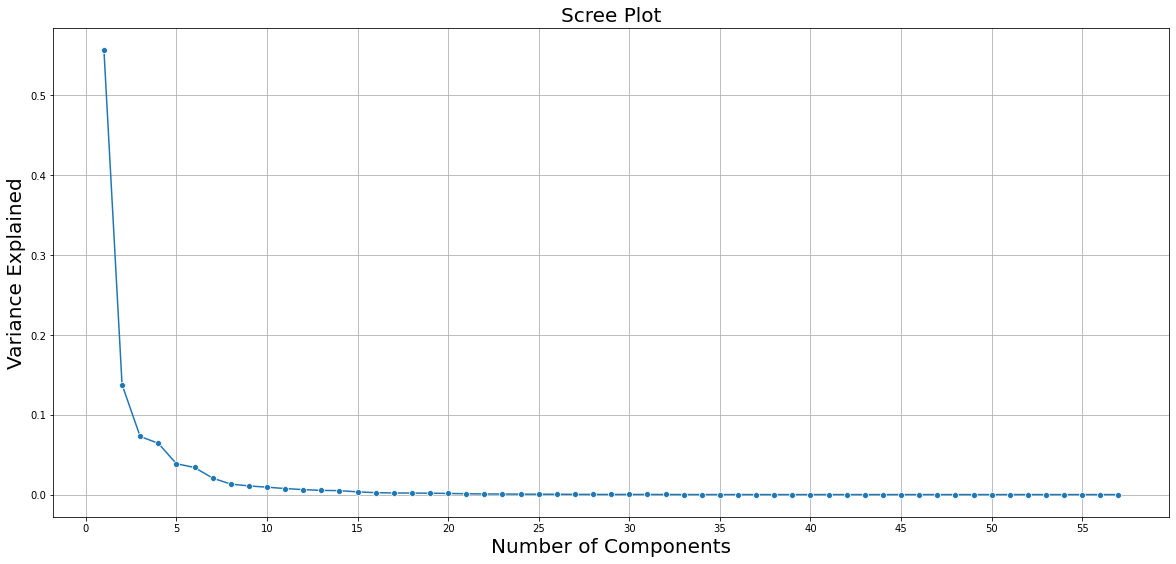

In [51]:
#Create a scree plot
plt.figure(figsize=(20,9))
sns.lineplot(y=pca.explained_variance_ratio_ ,x=range(1,58),marker='o')
plt.xticks(range(0,58,5))
plt.xlabel('Number of Components',fontsize=20)
plt.ylabel('Variance Explained',fontsize=20)
plt.title('Scree Plot',fontsize=20)
plt.grid()
plt.show()

In [52]:
#Check the cumlative explained variance ratio to find a cut off for selecting the number of PCs
np.cumsum(pca.explained_variance_ratio_)

array([0.55726063, 0.69510499, 0.76785794, 0.83212212, 0.87077261,
       0.9047243 , 0.92532669, 0.93848433, 0.94929292, 0.95854687,
       0.96607599, 0.97226701, 0.97745473, 0.98238168, 0.98574761,
       0.98813454, 0.99012071, 0.99198278, 0.99368693, 0.99509011,
       0.99609921, 0.99687687, 0.99754058, 0.9980597 , 0.99853404,
       0.99894473, 0.99919891, 0.99939134, 0.9995545 , 0.99969701,
       0.99983525, 0.99992329, 0.9999688 , 0.9999875 , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

The first six components explain more than 90% of the vcariance in the data. 

## 7- PCA: Compare PCs with Actual Columns and identify which is explaining most variance. Write inferences about all the Principal components in terms of actual variables.



In [53]:
df_extracted_loadings = pd.DataFrame(pca.components_.T, 
                                     columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6','PC7','PC8', 'PC9', 'PC10', 'PC11', 'PC12','PC13','PC14', 'PC15', 'PC16', 'PC17', 'PC18',
                                               'PC19','PC20', 'PC21', 'PC22', 'PC23', 'PC24','PC25','PC26', 'PC27', 'PC28', 'PC29', 'PC30',
                                               'PC7\31','PC32', 'PC33', 'PC34', 'PC35', 'PC36','PC37','PC38', 'PC39', 'PC40', 'PC41', 'PC42',
                                               'PC43','PC44', 'PC45', 'PC46', 'PC47', 'PC48','PC49', 'PC50', 'PC51',
                                               'PC52','PC53', 'PC54', 'PC55', 'PC56', 'PC57'],
                                    index = df_scaled.columns)

In [54]:
#Choose the PCs basis cumulative explained variance
df_selected = df_extracted_loadings[['PC1','PC2', 'PC3', 'PC4', 'PC5' ,'PC6']]

In [55]:
#Check the selected PCs
df_selected

,PC1,PC2,PC3,PC4,PC5,PC6
No_HH,0.156021,-0.126347,-0.002690,-0.125293,-0.007022,0.004083
TOT_M,0.167118,-0.089677,0.056698,-0.019942,-0.033026,-0.073389
TOT_F,0.165553,-0.104912,0.038749,-0.070873,-0.012847,-0.043647
M_06,0.162193,-0.022095,0.057788,0.011917,-0.050248,-0.157957
F_06,0.162566,-0.020271,0.050126,0.014844,-0.043848,-0.154436
M_SC,0.151358,-0.045111,0.002569,0.012485,-0.173007,-0.064295
F_SC,0.151567,-0.051924,-0.025101,-0.029893,-0.159803,-0.040518
M_ST,0.027234,0.027679,-0.123504,-0.222247,0.433163,0.222591
F_ST,0.028183,0.030223,-0.139769,-0.229754,0.438792,0.225531
M_LIT,0.161993,-0.115355,0.082168,-0.035163,-0.009101,-0.055465


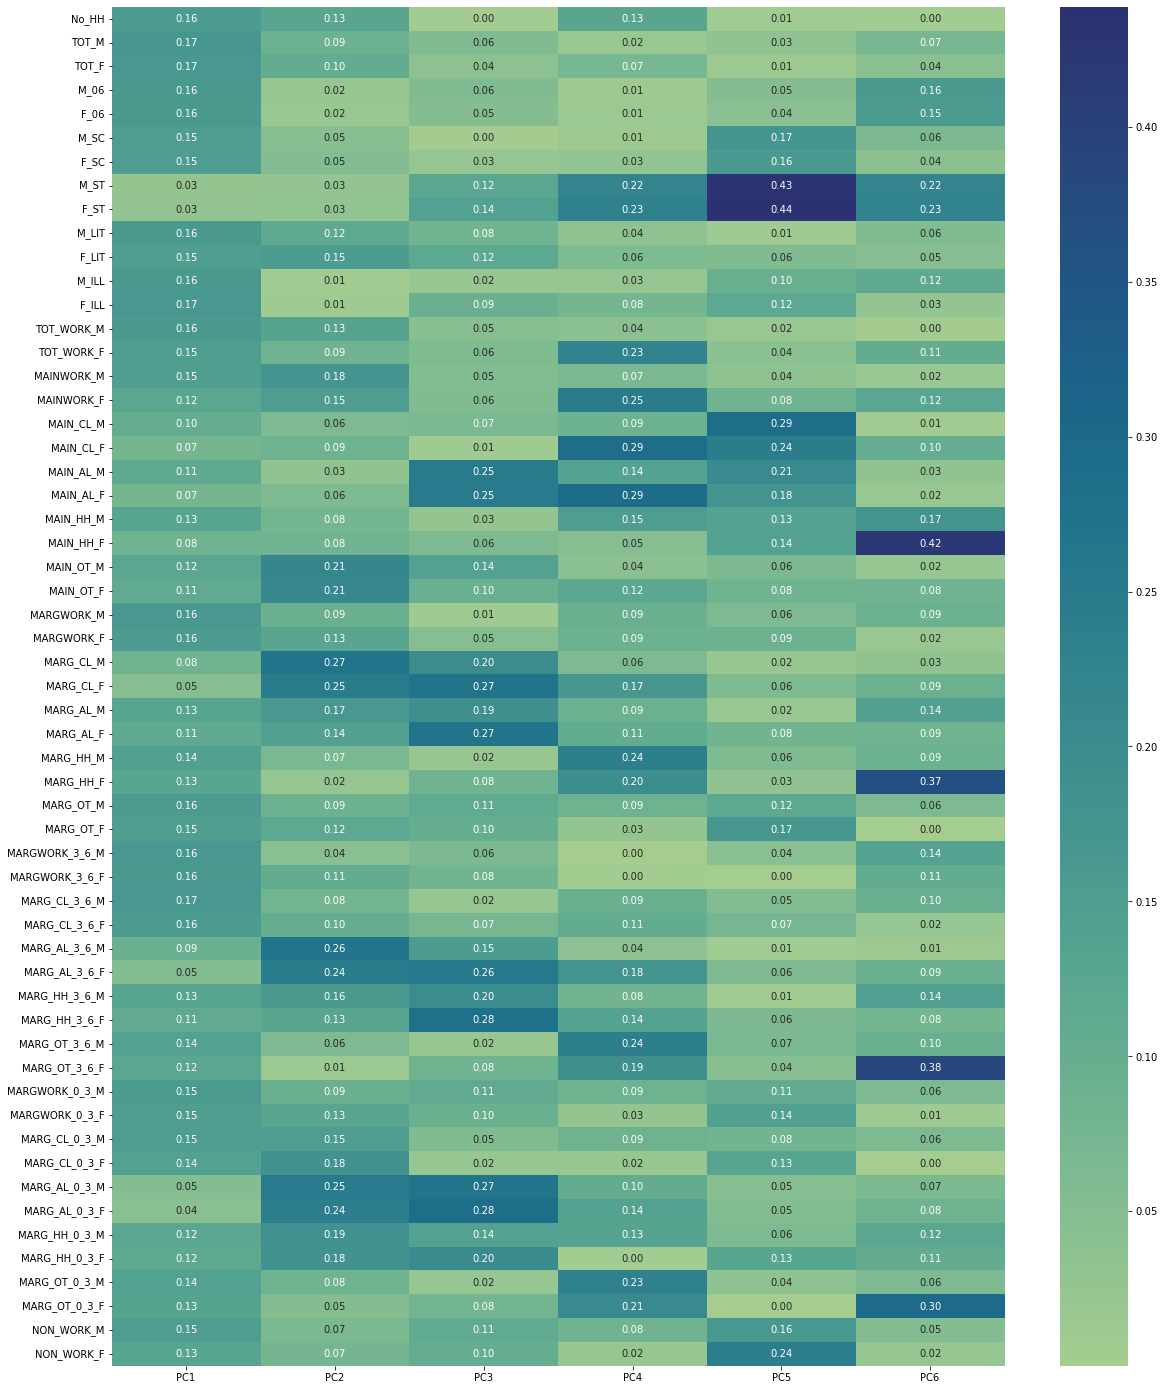

In [56]:
#Compare how the original features influence various PCs
plt.figure(figsize = (20,25))
sns.heatmap(abs(df_selected), annot = True, cmap = 'crest',fmt = '.2f');

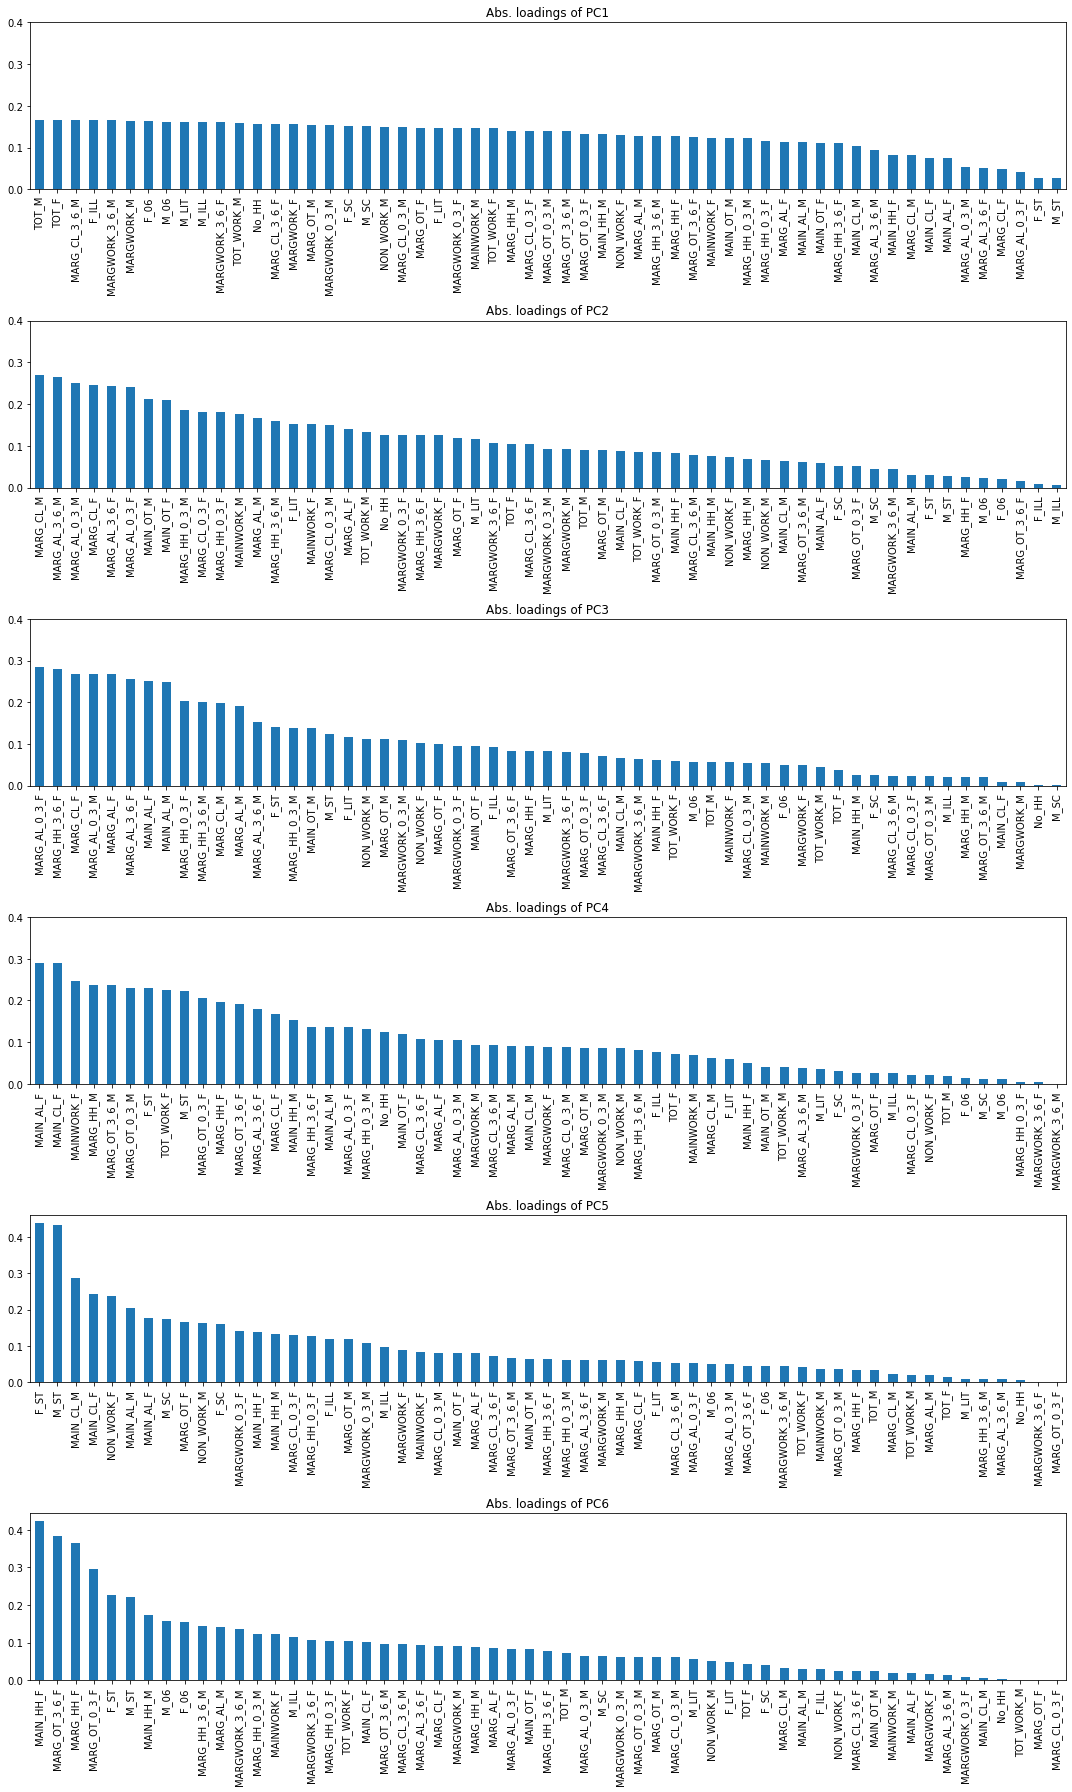

In [142]:
#Check as to how the original features matter to each PC
#Note: Here we are only considering the absolute values
plt.figure(figsize = (15,25))
for i in range(len(df_selected.columns)):
    plt.subplot(6,1,i+1)
    abs(df_selected[df_selected.columns[i]]).T.sort_values(ascending = False).plot.bar()
    plt.yticks(np.arange(0,0.5,.1))
    plt.title('Abs. loadings of {}'.format(df_selected.columns[i]))
    plt.tight_layout()

In [57]:
#Extract the required(as per the cumulative explained variance) number of PCs
pca = PCA(n_components=6, random_state=123)
pca_final = pca.fit_transform(df_scaled)

In [58]:
pca_final_df = pd.DataFrame(pca_final, columns = df_selected.columns)
pca_final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     640 non-null    float64
 1   PC2     640 non-null    float64
 2   PC3     640 non-null    float64
 3   PC4     640 non-null    float64
 4   PC5     640 non-null    float64
 5   PC6     640 non-null    float64
dtypes: float64(6)
memory usage: 30.1 KB


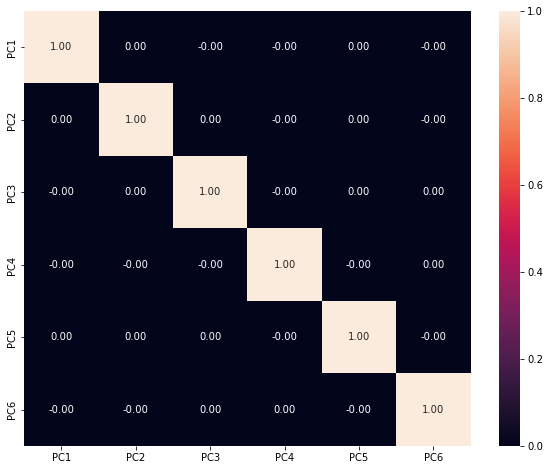

In [59]:
#Check for presence of correlations among teh PCs
plt.figure(figsize = (10,8))
sns.heatmap(pca_final_df.corr(), annot=True,fmt='.2f');

## 8 - PCA: Write linear equation for first PC.


In [60]:
for i in range(0,57):
    print("(",np.round(pca.components_[0][i],2),")",'*',df_scaled.columns[i], end=' + ')

( 0.16 ) * No_HH + ( 0.17 ) * TOT_M + ( 0.17 ) * TOT_F + ( 0.16 ) * M_06 + ( 0.16 ) * F_06 + ( 0.15 ) * M_SC + ( 0.15 ) * F_SC + ( 0.03 ) * M_ST + ( 0.03 ) * F_ST + ( 0.16 ) * M_LIT + ( 0.15 ) * F_LIT + ( 0.16 ) * M_ILL + ( 0.17 ) * F_ILL + ( 0.16 ) * TOT_WORK_M + ( 0.15 ) * TOT_WORK_F + ( 0.15 ) * MAINWORK_M + ( 0.12 ) * MAINWORK_F + ( 0.1 ) * MAIN_CL_M + ( 0.07 ) * MAIN_CL_F + ( 0.11 ) * MAIN_AL_M + ( 0.07 ) * MAIN_AL_F + ( 0.13 ) * MAIN_HH_M + ( 0.08 ) * MAIN_HH_F + ( 0.12 ) * MAIN_OT_M + ( 0.11 ) * MAIN_OT_F + ( 0.16 ) * MARGWORK_M + ( 0.16 ) * MARGWORK_F + ( 0.08 ) * MARG_CL_M + ( 0.05 ) * MARG_CL_F + ( 0.13 ) * MARG_AL_M + ( 0.11 ) * MARG_AL_F + ( 0.14 ) * MARG_HH_M + ( 0.13 ) * MARG_HH_F + ( 0.16 ) * MARG_OT_M + ( 0.15 ) * MARG_OT_F + ( 0.16 ) * MARGWORK_3_6_M + ( 0.16 ) * MARGWORK_3_6_F + ( 0.17 ) * MARG_CL_3_6_M + ( 0.16 ) * MARG_CL_3_6_F + ( 0.09 ) * MARG_AL_3_6_M + ( 0.05 ) * MARG_AL_3_6_F + ( 0.13 ) * MARG_HH_3_6_M + ( 0.11 ) * MARG_HH_3_6_F + ( 0.14 ) * MARG_OT_3_6_M + ( 0